# Analysis on subset of games for Atari


In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx


import atari3
atari3.run_init(do_not_train_on=["FirstReturn"]) 
from atari3 import *
algo_scores = atari3.algo_scores

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

game_genre = {
    'alien': "Maze",
    'amidar': "Maze",
    'assault': "Fixed Shooter",
    'asterix': "Action",
    'asteroids': "Multidirectional Shooter",
    'atlantis': "Fixed Shooter",
    'bank heist': "Maze",
    'battle zone': "First-person-shooter",
    'beam rider': "Fixed Shooter",
    'berzerk': "Multidirectional Shooter",
    'bowling': "Sports",
    'boxing': "Sports", 
    'breakout': "Action",
    'centipede': "Fixed Shooter",
    'chopper command': "Scrolling Shooter",
    'crazy climber': "Climbing",
    'defender': "Scrolling Shooter",
    
    'demon attack': "Fixed Shooter",
    'double dunk': "Sports",
    'enduro': "Racing / Driving",
    'fishing derby': "Action, Sports",
    'freeway': "Action",
    'frostbite': "Action",
    'gopher': "Action",
    'gravitar': "...",
    'hero': "...",
    'ice hockey': "Action, Sports",
    'james bond': "Action",
    'kangaroo': "Action",
    'krull': "Action",
    'kung fu master': "Action",
    'montezuma revenge': "Action",
    'ms pacman': "Action",
    'name this game': "Action",
    'phoenix': "Action",
    'pitfall': "Action",
    'pong': "...",
    'private eye': "Action",
    'qbert': "Action",
    'riverraid': "Action",
    'road runner': "Action, Racing / Driving",
    'robotank': "Action",
    'seaquest': "Action",
    'skiing': "Sports",
    'solaris': "Action",
    'space invaders': "Action",
    'star gunner': "...",
    'surround':  "...",
    'tennis': "...",
    'time pilot': "...",
    'tutankham': "...",
    'up n down': "...",
    'venture': "...",
    'video pinball': "...",
    'wizard of wor': "...",
    'yars revenge': "...",
    'zaxxon': "...",
}
    

more_than_1_k = [
    # more than 1000 score
    'Agent57',
    'MuZero (Res2 Adam)',
    'R2D2',
    'MuZero',
]

do_not_train_on = []

algo_scores["not_1k"] = [game not in more_than_1_k for game in algo_scores["Algorithm"]]

atari_subsets = [
    ("Atari-1",   ('battle zone',)),
    ("Atari-2",   ('amidar', 'time pilot')),
    ("Atari-3",   ('battle zone', 'gopher', 'time pilot')),
    ("Atari-4",   ('amidar', 'battle zone', 'gopher', 'time pilot')),     
    ("Atari-5",   ('enduro', 'krull', 'kung fu master', 'star gunner', 'time pilot')),
    ("Atari-val", ('krull', 'kung fu master', 'seaquest')),
    ("Atari-3+2", ('amidar', 'breakout', 'battle zone', 'gopher', 'time pilot')),
    ("DQN-7",     ('beam rider', 'breakout', 'enduro', 'pong', 'seaquest', 'space invaders')),
]


Found 62 games
Warning, multiple metrics, for MFEC Atari 2600 Q*Bert ignoring non-score. {'Best Score': '19750', 'Score': '14135'}
Warning, multiple metrics, for MFEC Atari 2600 HERO ignoring non-score. {'Best Score': '13190', 'Score': '11732'}
Warning, multiple metrics, for MFEC Atari 2600 Space Invaders ignoring non-score. {'Best Score': '2490', 'Score': '1990'}
Warning, multiple metrics, for MFEC Atari 2600 Ms. Pacman ignoring non-score. {'Best Score': '11301', 'Score': '8530.4004'}
Warning, multiple metrics, for MFEC Atari 2600 River Raid ignoring non-score. {'Best Score': '5080', 'Score': '3868'}
Warning, multiple metrics, for MFEC Atari 2600 Frostbite ignoring non-score. {'Best Score': '4020', 'Score': '2394'}
Algorithms total 84, algorithms with 40 or more games 45


# 1.Check the data

In [49]:
# show games with less than 25 datapoints
for game in canonical_57:    
    samples_count = len(algo_scores[algo_scores["Game"]==game])
    marker = "*" if samples_count < 25 else ""
    print(f"{game:<50} {samples_count}{marker}")

alien                                              46
amidar                                             46
assault                                            46
asterix                                            46
asteroids                                          45
atlantis                                           45
bank heist                                         45
battle zone                                        45
beam rider                                         45
berzerk                                            38
bowling                                            43
boxing                                             45
breakout                                           45
centipede                                          44
chopper command                                    45
crazy climber                                      45
defender                                           22*
demon attack                                       45
double dunk                

# 2. Plot showing best to worst games

**Todo**
* Would be nice to use genre as color here...

In [50]:
results = search_regression(1)

Checking all sets of 1 games.
Warning! Too many missing samples for: ('surround',)
Generated 57 models in 0.5s at 108.3 models/second.
('tennis',)                                                  0.01294    0.03590    98.70553   96.41005   473.9      [105.15164006164343, array([1.15412711])]
('pong',)                                                    0.02682    0.04945    97.31807   95.05486   470.6      [-94.71659741582027, array([3.7320298])]
('freeway',)                                                 0.02910    0.05168    97.09038   94.83247   470.0      [98.68015863591103, array([2.48884823])]
('boxing',)                                                  0.08950    0.11068    91.04950   88.93207   455.2      [-165.46403854007718, array([0.69912062])]
('surround',)                                                0.10832    0.16078    89.16759   83.92244   610.0      [-254.8939039525659, array([8.1945662])]
('enduro',)                                                  0.10912    0.129

[0.012944722615274684, 0.026819289920375744, 0.029096178919736593, 0.0895049839244525, 0.10832405934919953, 0.10911976782355448, 0.1221184155172117, 0.1614691866786815, 0.16178740876477837, 0.17287979611073168, 0.22864174464783793, 0.2453105548048855, 0.249249196690165, 0.2564871048913845, 0.26790198363802653, 0.27488029830213434, 0.28238509331687345, 0.30654626737988755, 0.3214402796212935, 0.4198522181461092, 0.42068374364477357, 0.4416198394786739, 0.4480333444087128, 0.4547094106914338, 0.4747098282080833, 0.49787385997022027, 0.5146507835749581, 0.5282140391848826, 0.5400207254881088, 0.6014685842291753, 0.6086270662554849, 0.6436218610985538, 0.6552959711054185, 0.6864601398846664, 0.7092012122086607, 0.7167330144077243, 0.7286991691831632, 0.7327031820311324, 0.7333451948737041, 0.7387390447049427, 0.7460099818262573, 0.7522347774938369, 0.773513822464508, 0.7941665900936634, 0.7942012541155954, 0.8028458450825844, 0.8216583603626926, 0.8470216264580284, 0.8630298931093557, 0.86

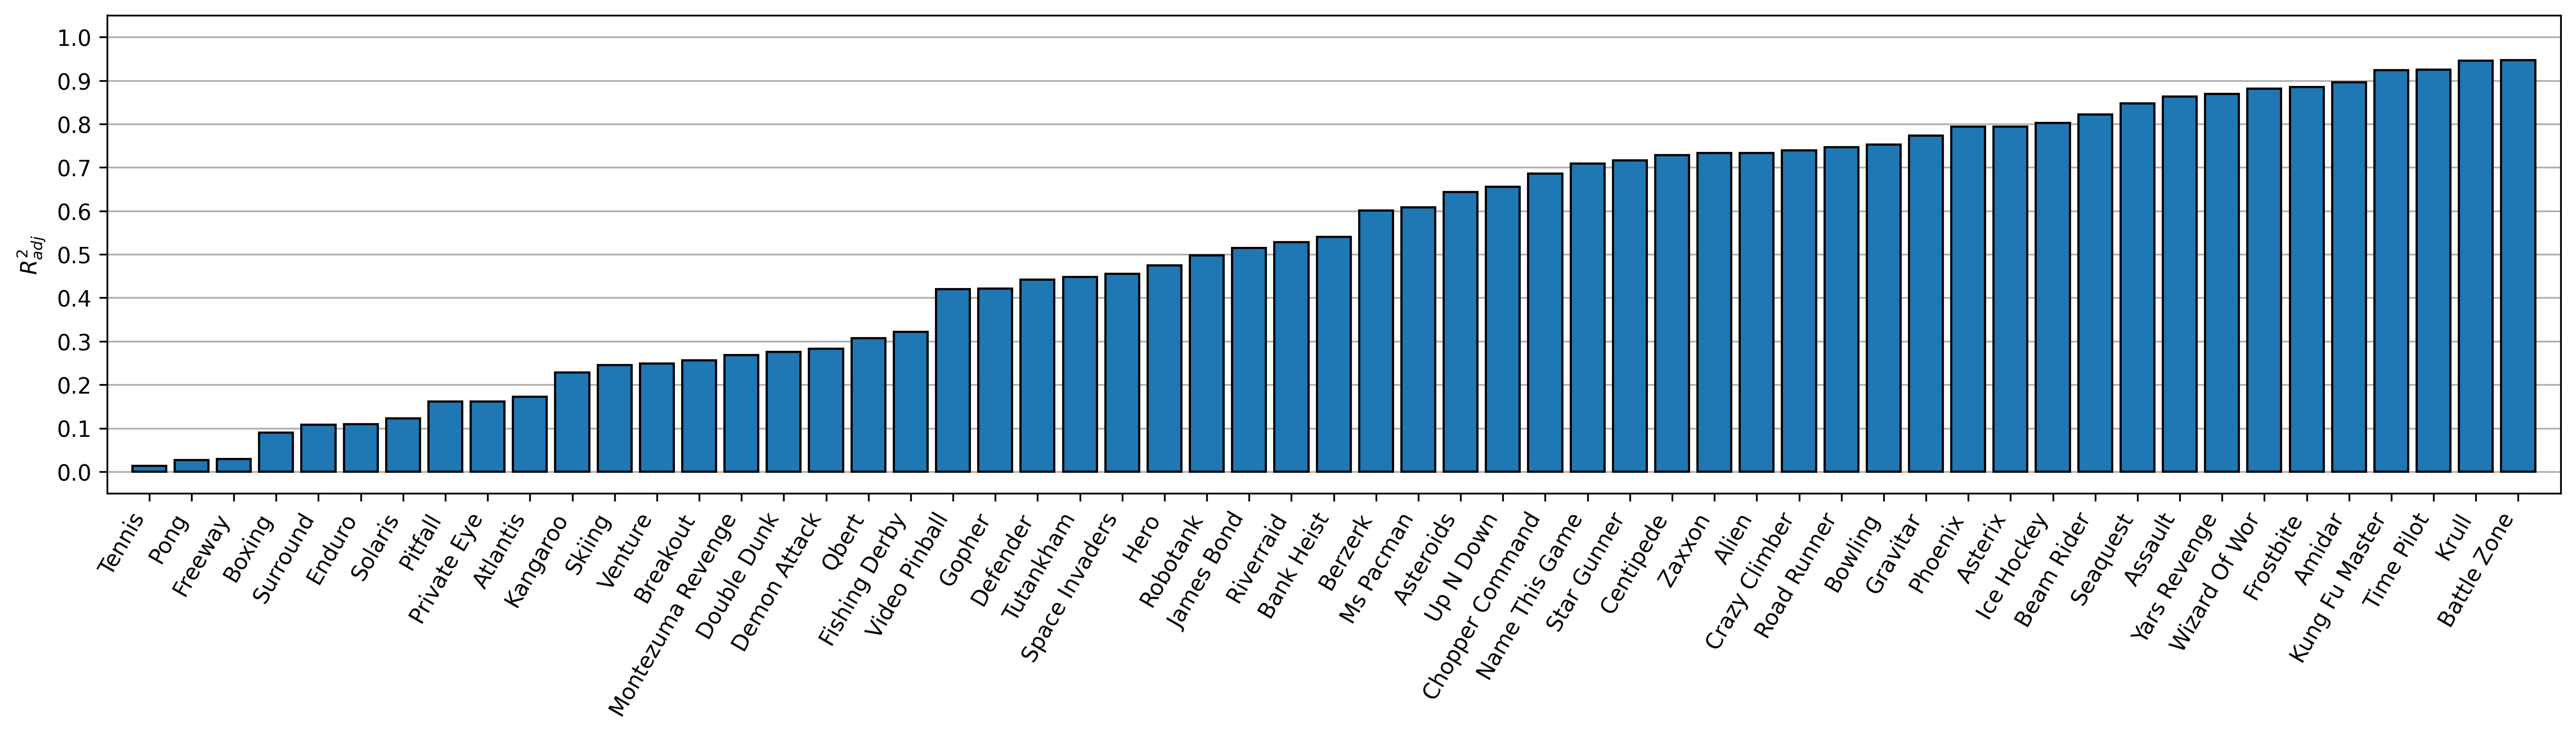

57 ['Tennis', 'Pong', 'Freeway', 'Boxing', 'Surround', 'Enduro', 'Solaris', 'Pitfall', 'Private Eye', 'Atlantis', 'Kangaroo', 'Skiing', 'Venture', 'Breakout', 'Montezuma Revenge', 'Double Dunk', 'Demon Attack', 'Qbert', 'Fishing Derby', 'Video Pinball', 'Gopher', 'Defender', 'Tutankham', 'Space Invaders', 'Hero', 'Robotank', 'James Bond', 'Riverraid', 'Bank Heist', 'Berzerk', 'Ms Pacman', 'Asteroids', 'Up N Down', 'Chopper Command', 'Name This Game', 'Star Gunner', 'Centipede', 'Zaxxon', 'Alien', 'Crazy Climber', 'Road Runner', 'Bowling', 'Gravitar', 'Phoenix', 'Asterix', 'Ice Hockey', 'Beam Rider', 'Seaquest', 'Assault', 'Yars Revenge', 'Wizard Of Wor', 'Frostbite', 'Amidar', 'Kung Fu Master', 'Time Pilot', 'Krull', 'Battle Zone']


In [51]:
def cap(s):
    return " ".join(x.capitalize() for x in s.split(' '))

def get_game_genre_color(game):
    game = game.lower()
    if game not in game_genre:
        return "black"
    genre = game_genre[game]
    if genre == "Action":
        return cm(0)
    if genre == "Sports":
        return cm(1)
    return cm(2)

cm = plt.get_cmap("tab10")

results.sort(key=lambda x: -x[0])
scores, _, _, envs,_ = zip(*results)
print([1-score for score in scores])
scores = [max(1-score,0) for score in scores] # from ev to r2
envs = [cap(env[0]) for env in envs]
plt.figure(figsize=(20,4))
plt.gca().grid(axis="y", zorder=0)
colors = [get_game_genre_color(game) for game in envs]
plt.bar(x=envs, height=scores, zorder=3, color = cm(0), edgecolor="black")
plt.ylim(-0.05,1.05)
plt.xlim(-1,57)
yticks = np.arange(0, 1.0+0.1, 0.1)
print(yticks)
plt.gca().set_yticks(yticks)
plt.xticks(rotation=60, ha="right")
plt.ylabel("$R_{adj}^2$")

# colors = {
#     'Action':cm(0), 
#     'Sport':cm(1),
#     'Other':cm(2),
# }
# _labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in _labels]
# plt.legend(handles, _labels)

plt.show()

print(len(envs), envs)

# 3. Show Atari-x performance

---------------------
Atari-1
---------------------
filtered: 2371 2316

('battle zone',) 0.9474456821374442 109.35993186167202
$88.7456 + \textbf{S} \cdot \begin{pmatrix} 0.7934 \end{pmatrix} $\\
battle zone    2.432160e-28
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 2211.5 & 11.9\% \\
Ape-X & 434.1 & 308.7 & 28.9\% \\
FirstReturn & 1446.0 & 2358.8 & 63.1\% \\
MuZero & 2041.1 & 2016.7 & 1.2\% \\
Nature DQN & 82.7 & 143.3 & 73.2\% \\
R2D2 & 1926.7 & 1796.3 & 6.8\% \\
Rainbow 200M & 231.0 & 224.6 & 2.8\% \\


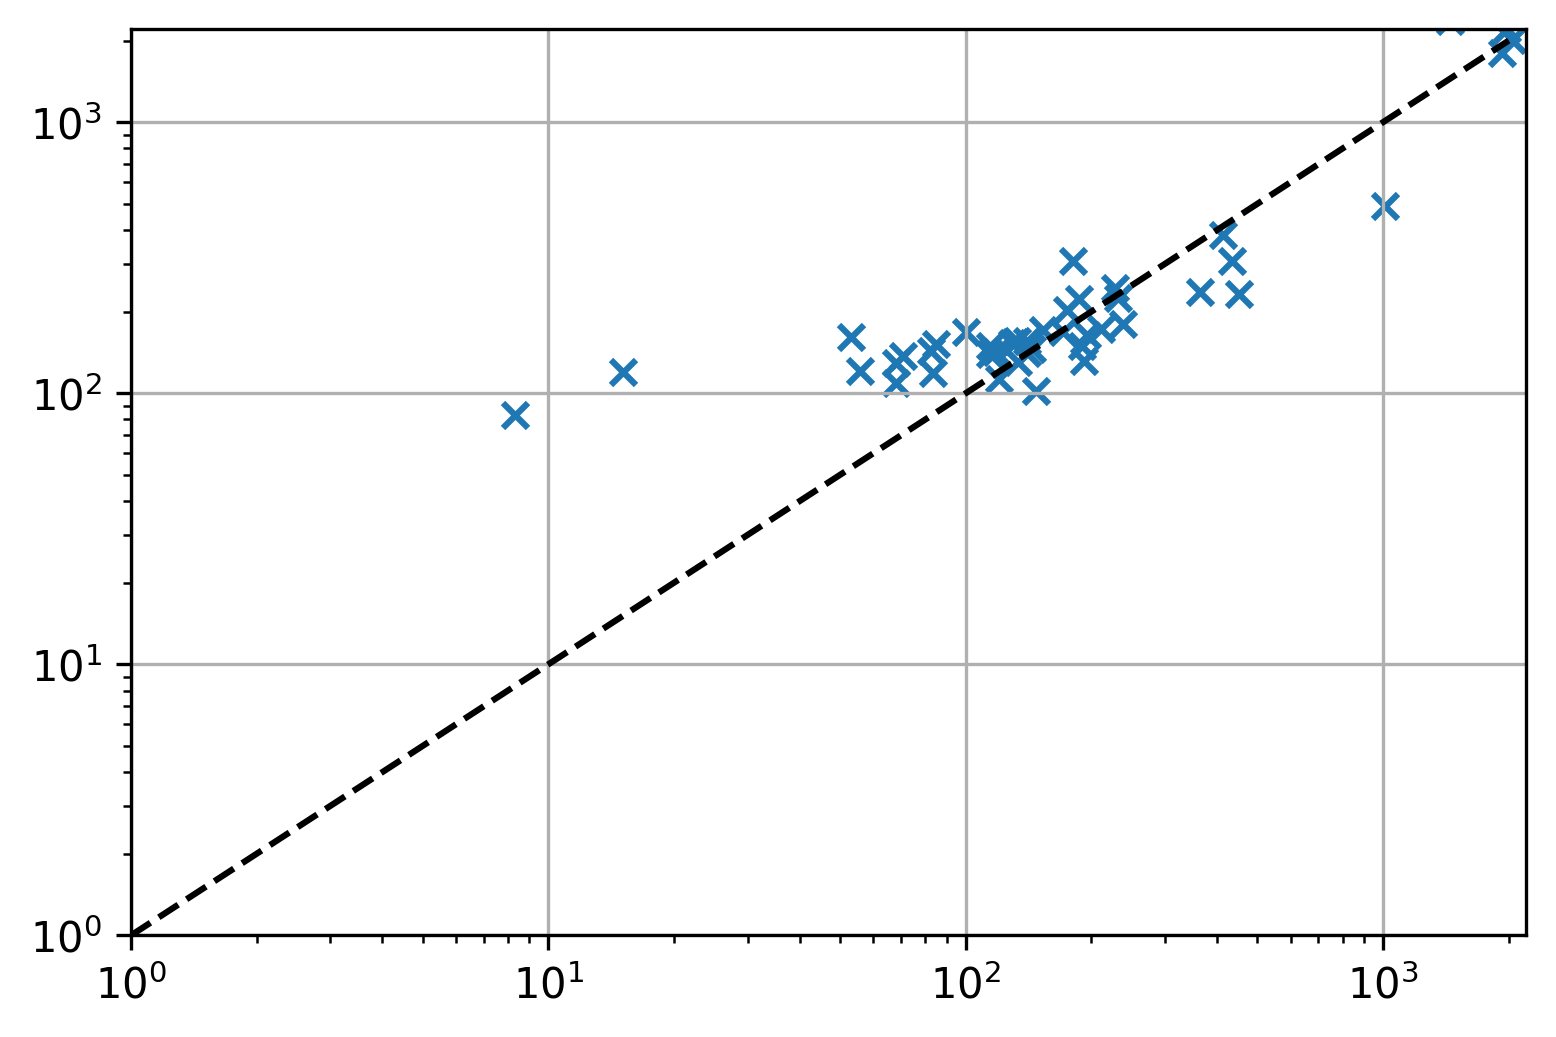

---------------------
Atari-2
---------------------
filtered: 2371 2316

('amidar', 'time pilot') 0.9916016493312292 43.19349183880888
$74.7397 + \textbf{S} \cdot \begin{pmatrix} 0.5449 & 0.0368 \end{pmatrix} $\\
amidar        9.626171e-14
time pilot    8.997561e-16
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 1907.1 & 3.5\% \\
Ape-X & 434.1 & 534.7 & 23.2\% \\
FirstReturn & 1446.0 & 1079.9 & 25.3\% \\
MuZero & 2041.1 & 2032.3 & 0.4\% \\
Nature DQN & 82.7 & 103.3 & 24.9\% \\
R2D2 & 1926.7 & 1984.7 & 3.0\% \\
Rainbow 200M & 231.0 & 258.4 & 11.9\% \\


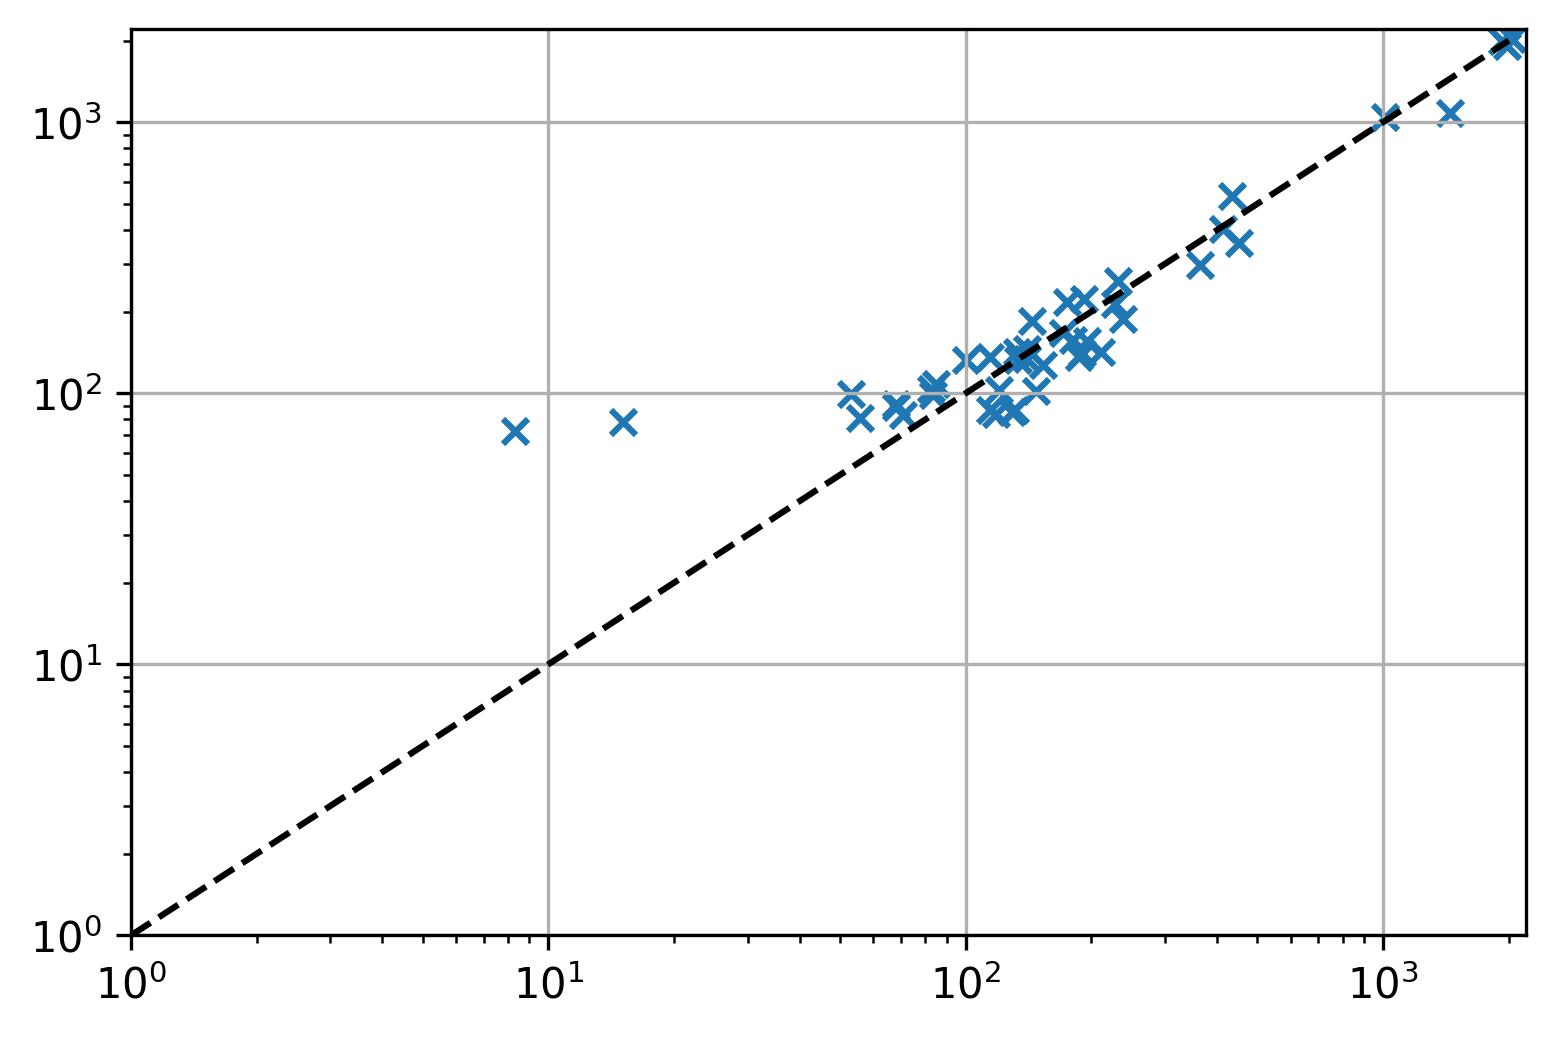

---------------------
Atari-3
---------------------
filtered: 2371 2316

('battle zone', 'gopher', 'time pilot') 0.995265487495252 32.03295574035211
$44.8205 + \textbf{S} \cdot \begin{pmatrix} 0.4669 & 0.0229 & 0.0252 \end{pmatrix} $\\
battle zone    2.125268e-21
gopher         1.467961e-13
time pilot     3.380836e-13
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 2029.7 & 2.7\% \\
Ape-X & 434.1 & 429.0 & 1.2\% \\
FirstReturn & 1446.0 & 1796.8 & 24.3\% \\
MuZero & 2041.1 & 2036.8 & 0.2\% \\
Nature DQN & 82.7 & 89.3 & 7.9\% \\
R2D2 & 1926.7 & 1853.5 & 3.8\% \\
Rainbow 200M & 231.0 & 213.6 & 7.5\% \\


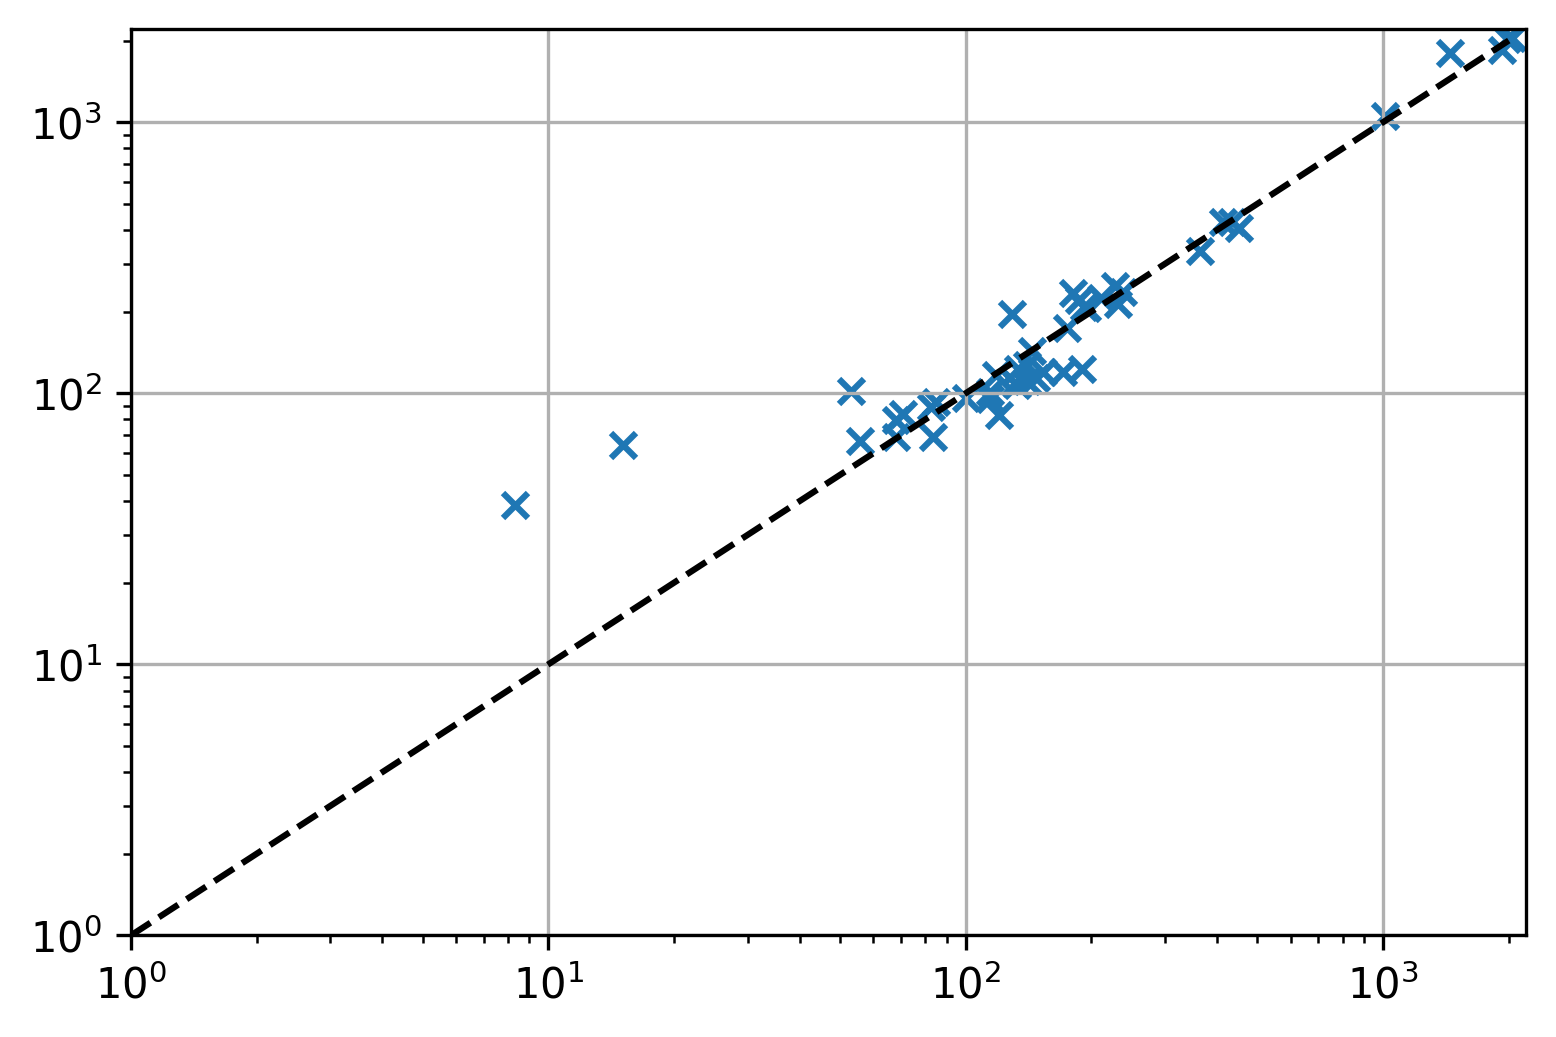

---------------------
Atari-4
---------------------
filtered: 2371 2316

('amidar', 'battle zone', 'gopher', 'time pilot') 0.9966283984971664 26.691919532353733
$48.9127 + \textbf{S} \cdot \begin{pmatrix} 0.2171 & 0.2937 & 0.0187 & 0.0281 \end{pmatrix} $\\
amidar         6.586671e-02
battle zone    6.928826e-06
gopher         2.887763e-12
time pilot     3.192698e-13
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 1991.2 & 0.8\% \\
Ape-X & 434.1 & 485.5 & 11.8\% \\
FirstReturn & 1446.0 & 1551.4 & 7.3\% \\
MuZero & 2041.1 & 2037.5 & 0.2\% \\
Nature DQN & 82.7 & 89.6 & 8.3\% \\
R2D2 & 1926.7 & 1906.8 & 1.0\% \\
Rainbow 200M & 231.0 & 240.8 & 4.3\% \\


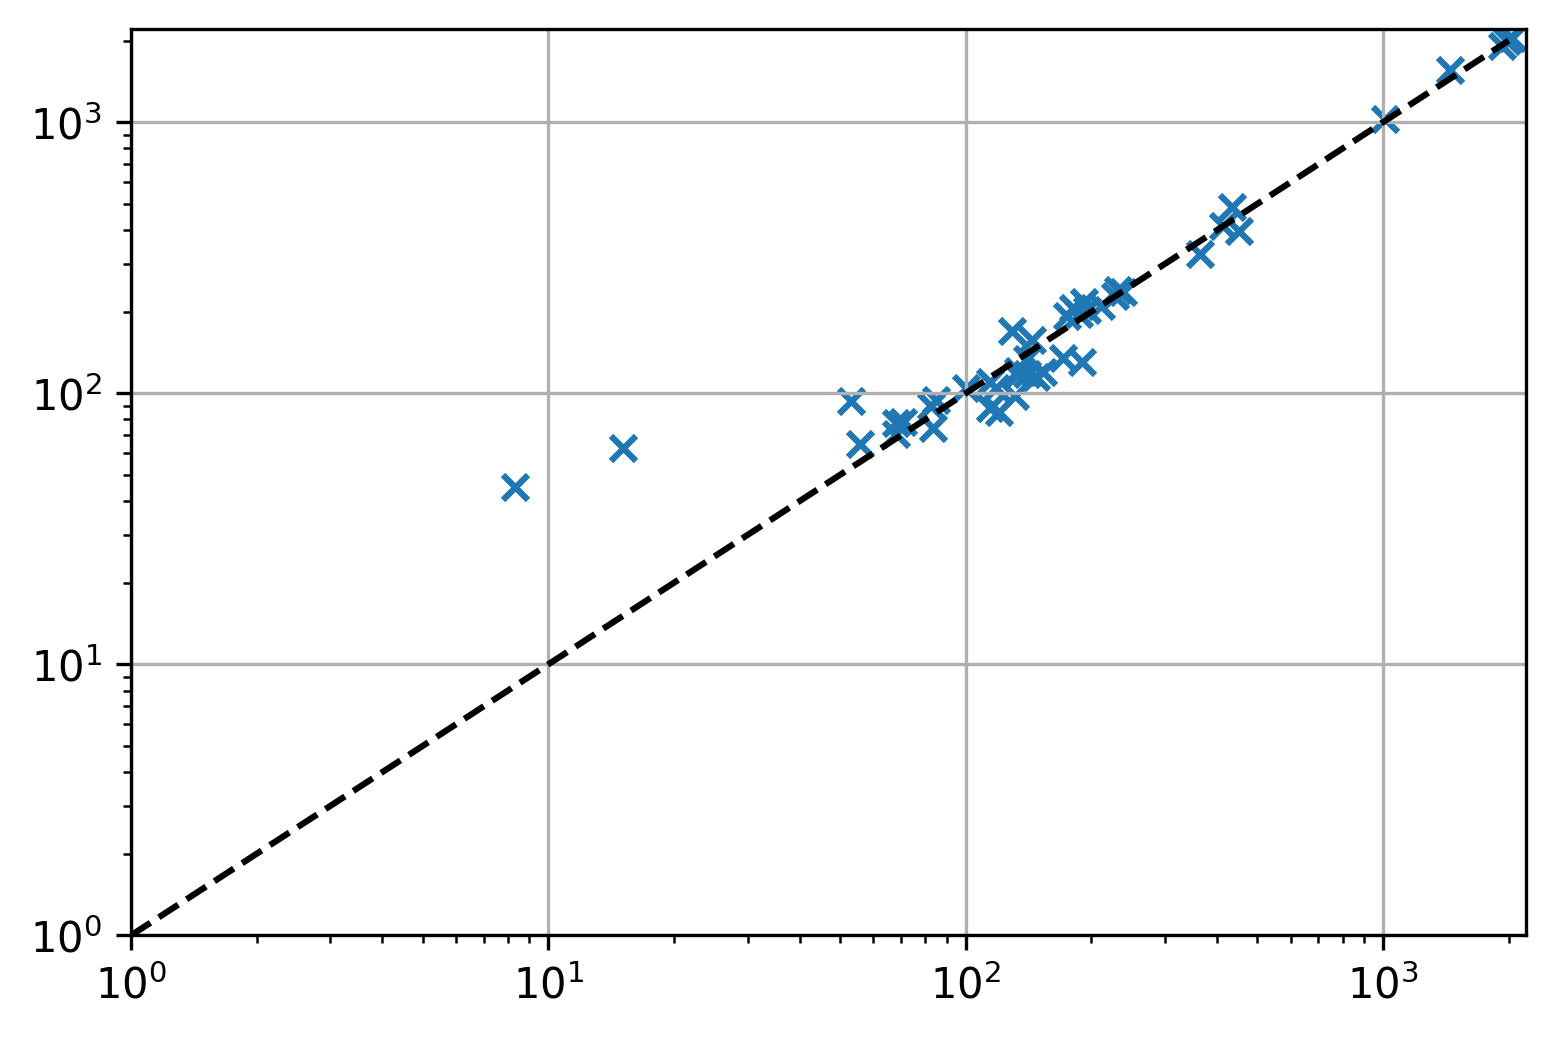

---------------------
Atari-5
---------------------
filtered: 2371 2316

('enduro', 'krull', 'kung fu master', 'star gunner', 'time pilot') 0.9978621974034831 21.53254886881687
$4.5982 + \textbf{S} \cdot \begin{pmatrix} 0.2163 & 0.0401 & 0.2309 & 0.0324 & 0.0203 \end{pmatrix} $\\
enduro            1.939698e-06
krull             2.680698e-24
kung fu master    3.038036e-05
star gunner       7.936756e-10
time pilot        2.554848e-17
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 1992.3 & 0.8\% \\
Ape-X & 434.1 & 446.6 & 2.9\% \\
FirstReturn & 1446.0 & 712.7 & 50.7\% \\
MuZero & 2041.1 & 2044.9 & 0.2\% \\
Nature DQN & 82.7 & 66.4 & 19.7\% \\
R2D2 & 1926.7 & 1901.3 & 1.3\% \\
Rainbow 200M & 231.0 & 192.4 & 16.7\% \\


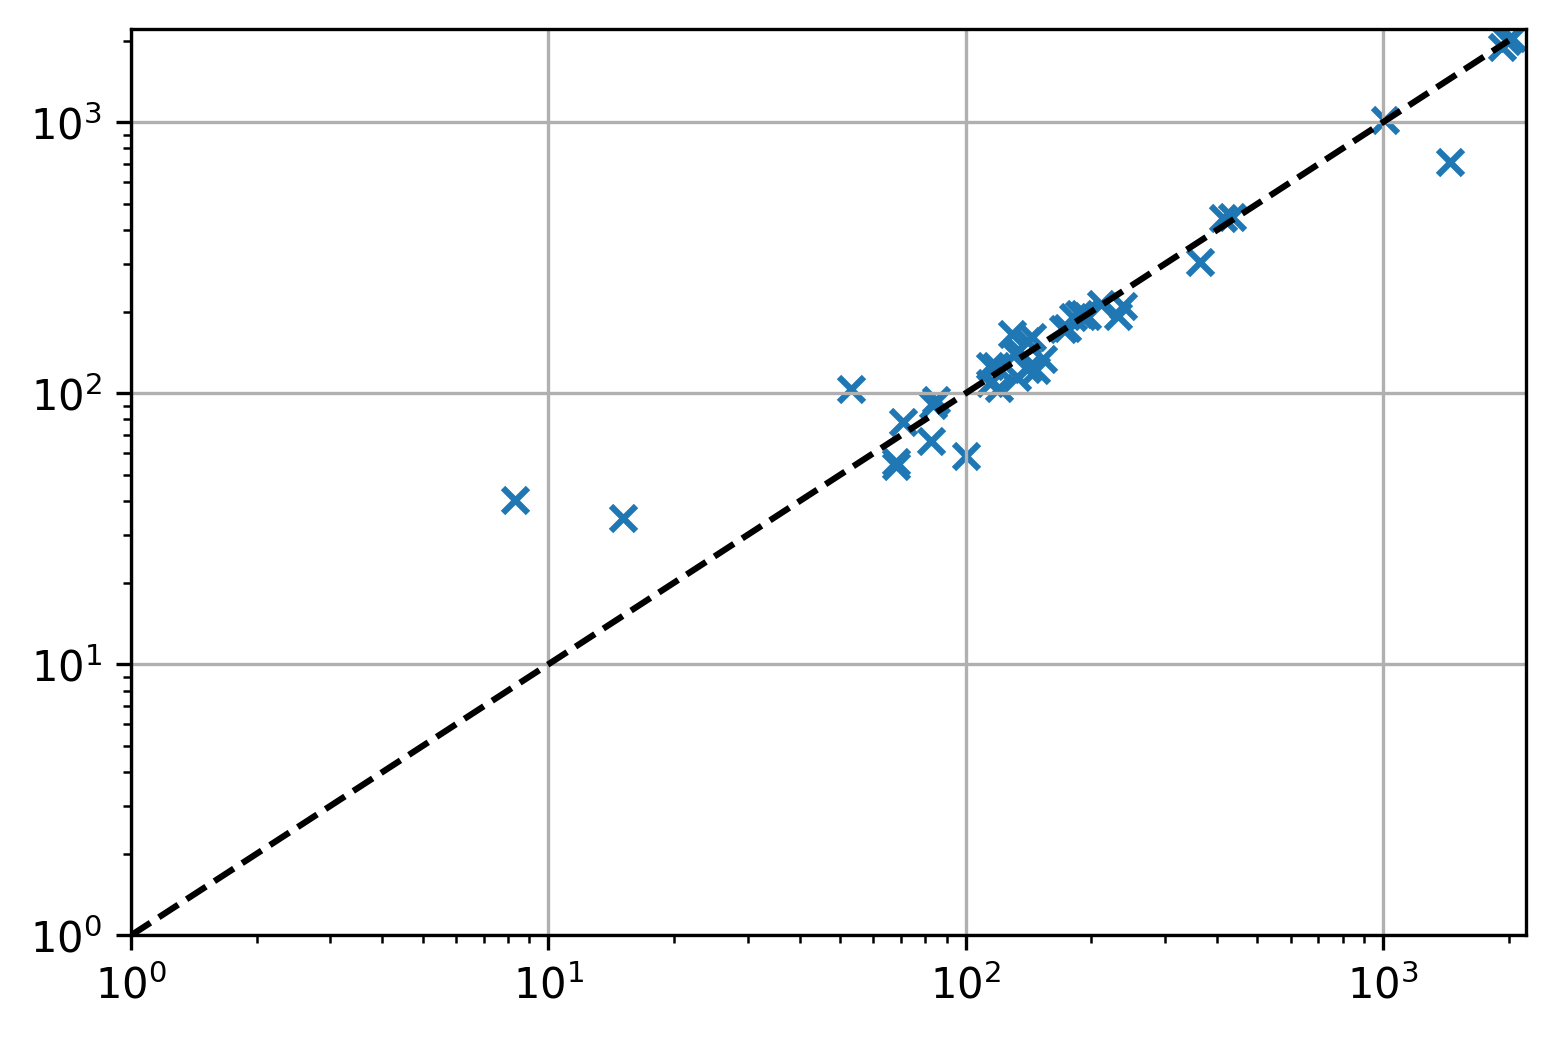

---------------------
Atari-val
---------------------
filtered: 2371 2316

('krull', 'kung fu master', 'seaquest') 0.9916830871462852 43.199479619406546
$1.7094 + \textbf{S} \cdot \begin{pmatrix} 0.0457 & 0.6162 & 0.1444 \end{pmatrix} $\\
krull             2.210032e-20
kung fu master    5.791579e-17
seaquest          3.014501e-08
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 1984.9 & 0.5\% \\
Ape-X & 434.1 & 447.8 & 3.2\% \\
FirstReturn & 1446.0 & 516.9 & 64.2\% \\
MuZero & 2041.1 & 2053.7 & 0.6\% \\
Nature DQN & 82.7 & 76.0 & 8.1\% \\
R2D2 & 1926.7 & 1914.0 & 0.7\% \\
Rainbow 200M & 231.0 & 180.1 & 22.0\% \\


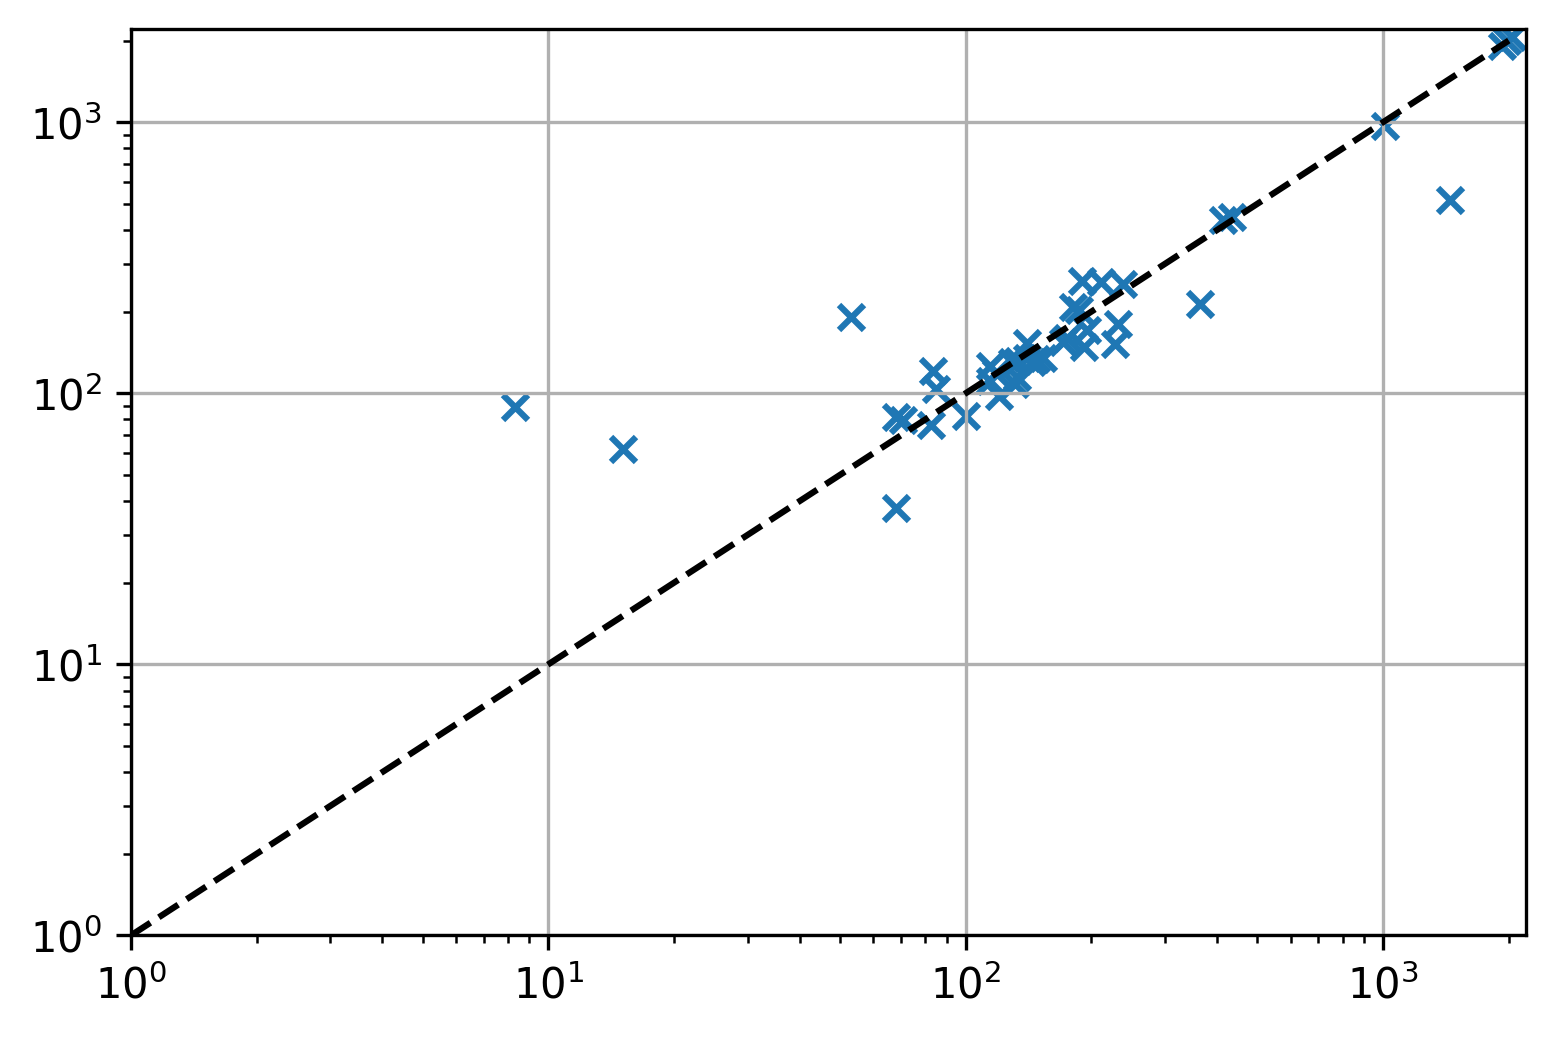

---------------------
Atari-3+2
---------------------
filtered: 2371 2316

('amidar', 'breakout', 'battle zone', 'gopher', 'time pilot') 0.9975595711778774 22.41580062061311
$26.6452 + \textbf{S} \cdot \begin{pmatrix} 0.2173 & 0.0205 & 0.2962 & 0.0140 & 0.0274 \end{pmatrix} $\\
amidar         2.650022e-04
breakout       4.526852e-10
battle zone    6.705852e-09
gopher         2.061797e-05
time pilot     1.592916e-20
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 1990.6 & 0.8\% \\
Ape-X & 434.1 & 491.1 & 13.1\% \\
FirstReturn & 1446.0 & 1554.9 & 7.5\% \\
MuZero & 2041.1 & 2036.0 & 0.2\% \\
Nature DQN & 82.7 & 94.0 & 13.6\% \\
R2D2 & 1926.7 & 1905.2 & 1.1\% \\
Rainbow 200M & 231.0 & 232.8 & 0.8\% \\


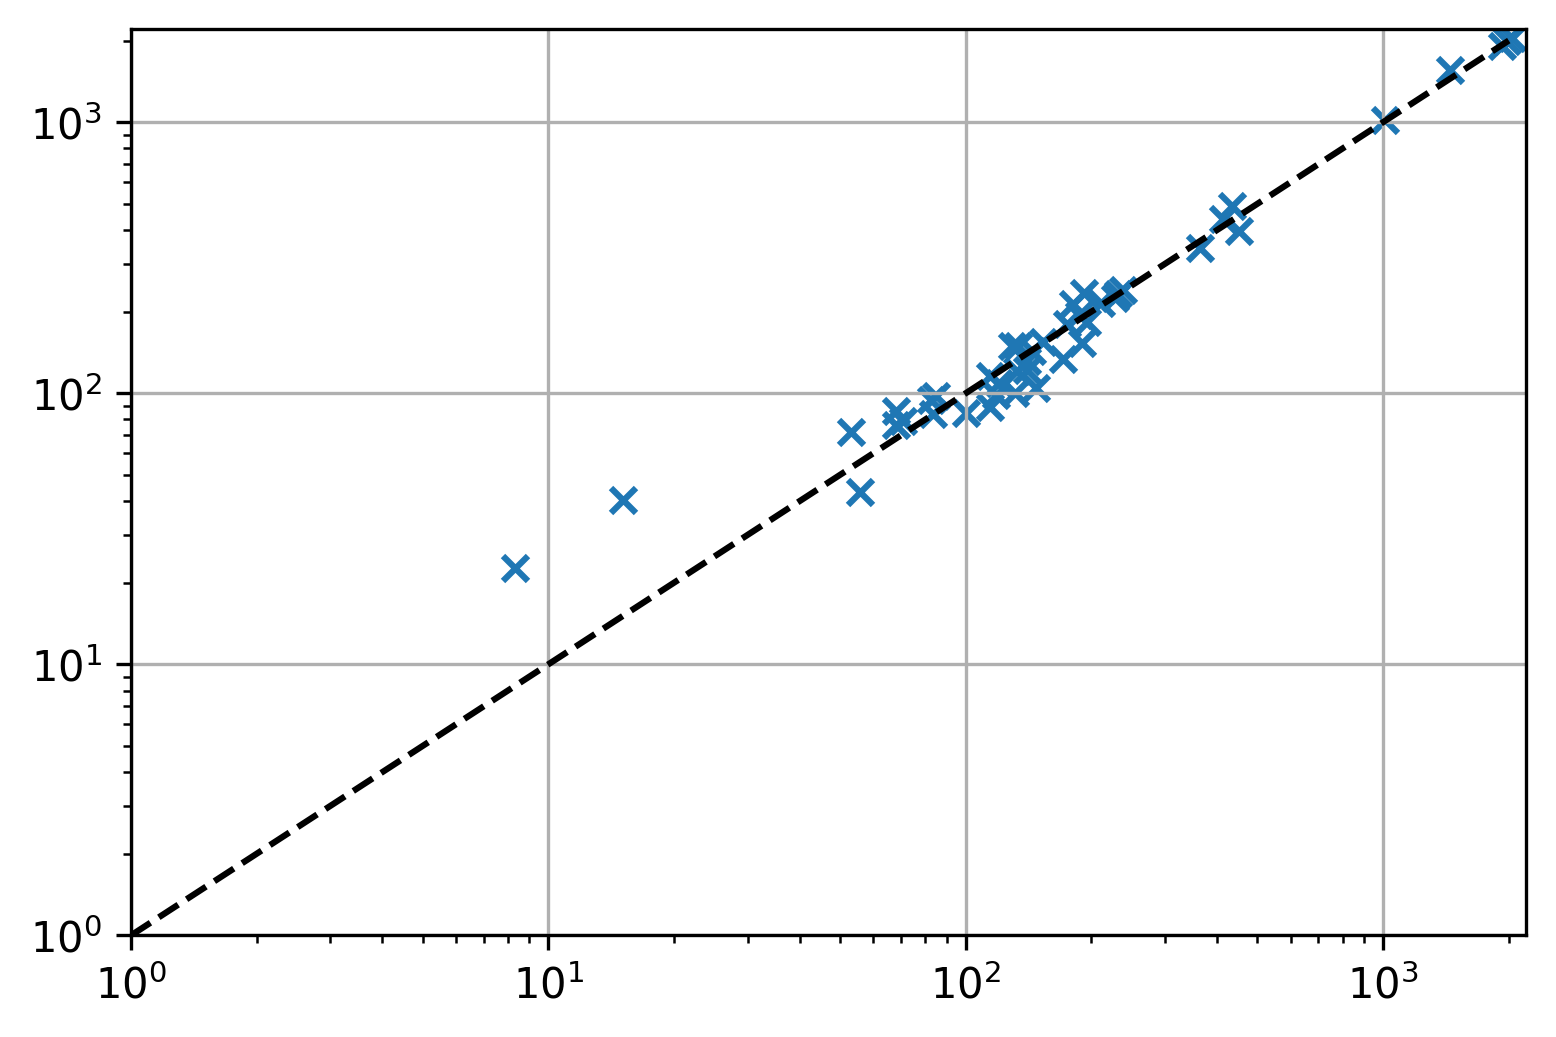

---------------------
DQN-7
---------------------
filtered: 2371 2316

('beam rider', 'breakout', 'enduro', 'pong', 'seaquest', 'space invaders') 0.8805006386311724 154.77935703339278
$10.6491 + \textbf{S} \cdot \begin{pmatrix} 0.2530 & -0.0440 & 0.2577 & 0.5967 & 0.3708 & 0.0813 \end{pmatrix} $\\
beam rider        0.036251
breakout          0.314915
enduro            0.321090
pong              0.304581
seaquest          0.000217
space invaders    0.019477
Name: P>|t|, dtype: float64
Agent57 & 1975.8 & 1632.1 & 17.4\% \\
Ape-X & 434.1 & 758.8 & 74.8\% \\
FirstReturn & 1446.0 & 1534.9 & 6.1\% \\
MuZero & 2041.1 & 1995.0 & 2.3\% \\
Nature DQN & 82.7 & 49.9 & 39.7\% \\
R2D2 & 1926.7 & 1424.9 & 26.0\% \\
Rainbow 200M & 231.0 & 219.9 & 4.8\% \\


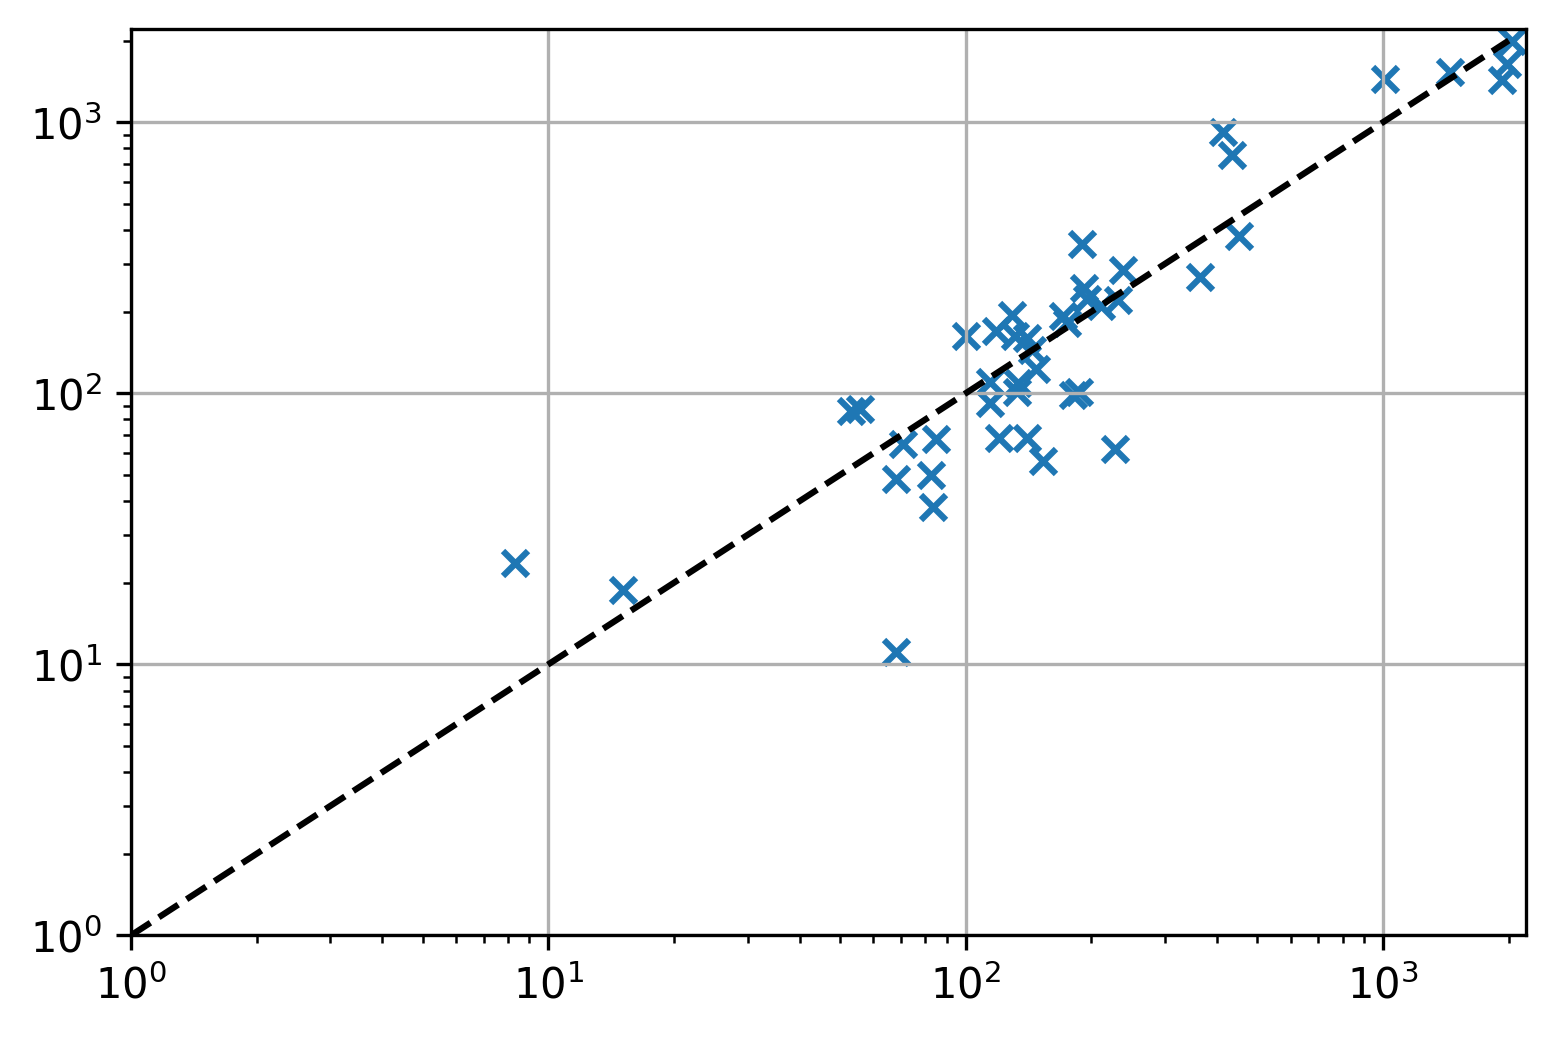

In [52]:
for subset_name, games_subset in atari_subsets:    

    print("---------------------")
    print(subset_name)
    print("---------------------")

    filtered_algo_scores = algo_scores[algo_scores["train"]]
    filtered_algo_scores = filtered_algo_scores[filtered_algo_scores["In57"]]
    print("filtered:", len(algo_scores), len(filtered_algo_scores))
    
    lm, (X, y) = fit_model(games_subset, filtered_algo_scores, median_scores)
    
    predicted_scores = lm.predict(X)
    errors = np.abs(y - predicted_scores)
    rms = (errors ** 2).mean() ** 0.5
    r2 = lm.score(X, y)

    SS_Residual = sum((y - predicted_scores) ** 2)
    SS_Total = sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (float(SS_Residual)) / SS_Total

    N = len(y)
    K = X.shape[1]
    adjusted_r2 = 1 - (1 - r_squared) * (N - 1) / (N - K - 1)
        
    
    print()
    print(games_subset, adjusted_r2, rms)

    
    # show coefficents        
    coefs = " & ".join(f"{coef:.4f}" for coef in lm.coef_)
        
    print("$"+f"{lm.intercept_:.4f}" + " + \\textbf{S} \\cdot \\begin{pmatrix} "+coefs+" \\end{pmatrix} $\\\\")
    
    scores = get_subset(games_subset, algo_scores)    
    X_all = scores.pivot_table(index='Algorithm', columns="Game", values="Normalized", fill_value=None)[list(games_subset)]
        
    mask = np.all(X_all.notna(), axis=1)
    X_all = X_all.sort_values("Algorithm")  # needs to be in algorithm order to match true_scores
    y_all = np.asarray([median_scores[algo] for algo in X_all.index])
    
    xs = np.asarray([v for k,v in median_scores.items()])[mask]
    ys = np.asarray(lm.predict(X_all[mask]))
       
    plt.loglog(figsize=(8,6))
    plt.grid(True)
    ax = plt.gca()
    xs = inv_transform_score(xs)
    ys = inv_transform_score(ys)
    plt.scatter(xs, ys, marker='x')
    
    plt.xlim(1, 2200)
    plt.ylim(1, 2200)
    plt.plot([1, 2000], [1, 2000], ls="--", c="black")        
    
    # p values
    import statsmodels
    import statsmodels.api as sm
    mod = sm.OLS(y, X)
    fii = mod.fit()
    p_values = fii.summary2().tables[1]['P>|t|']
    print(p_values)

    # show important predictions
    for i in range(len(X_all[mask])):
        row = X_all[mask].iloc[i]        
        algo = row.name
        if algo in ["Nature DQN", "Rainbow 200M", "Agent57"] + ['Ape-X', 'C51', 'R2D2', 'MuZero'] + ['FirstReturn']:
            #print(f"{algo}: {inv_transform_score(ys[i]):<.1f} vs {inv_transform_score(median_scores[algo]):.1f}")    
            y_pred = ys[i]
            y_true = inv_transform_score(median_scores[algo])
            y_error = abs(y_true-y_pred) / y_true
            print(f"{algo} & {y_true:.1f} & {ys[i]:<.1f} & {y_error*100:.1f}\\% \\\\")    
    plt.show()


[0.9474456821374442, 0.9916016493312292, 0.995265487495252, 0.9966283984971664, 0.9978621974034831]


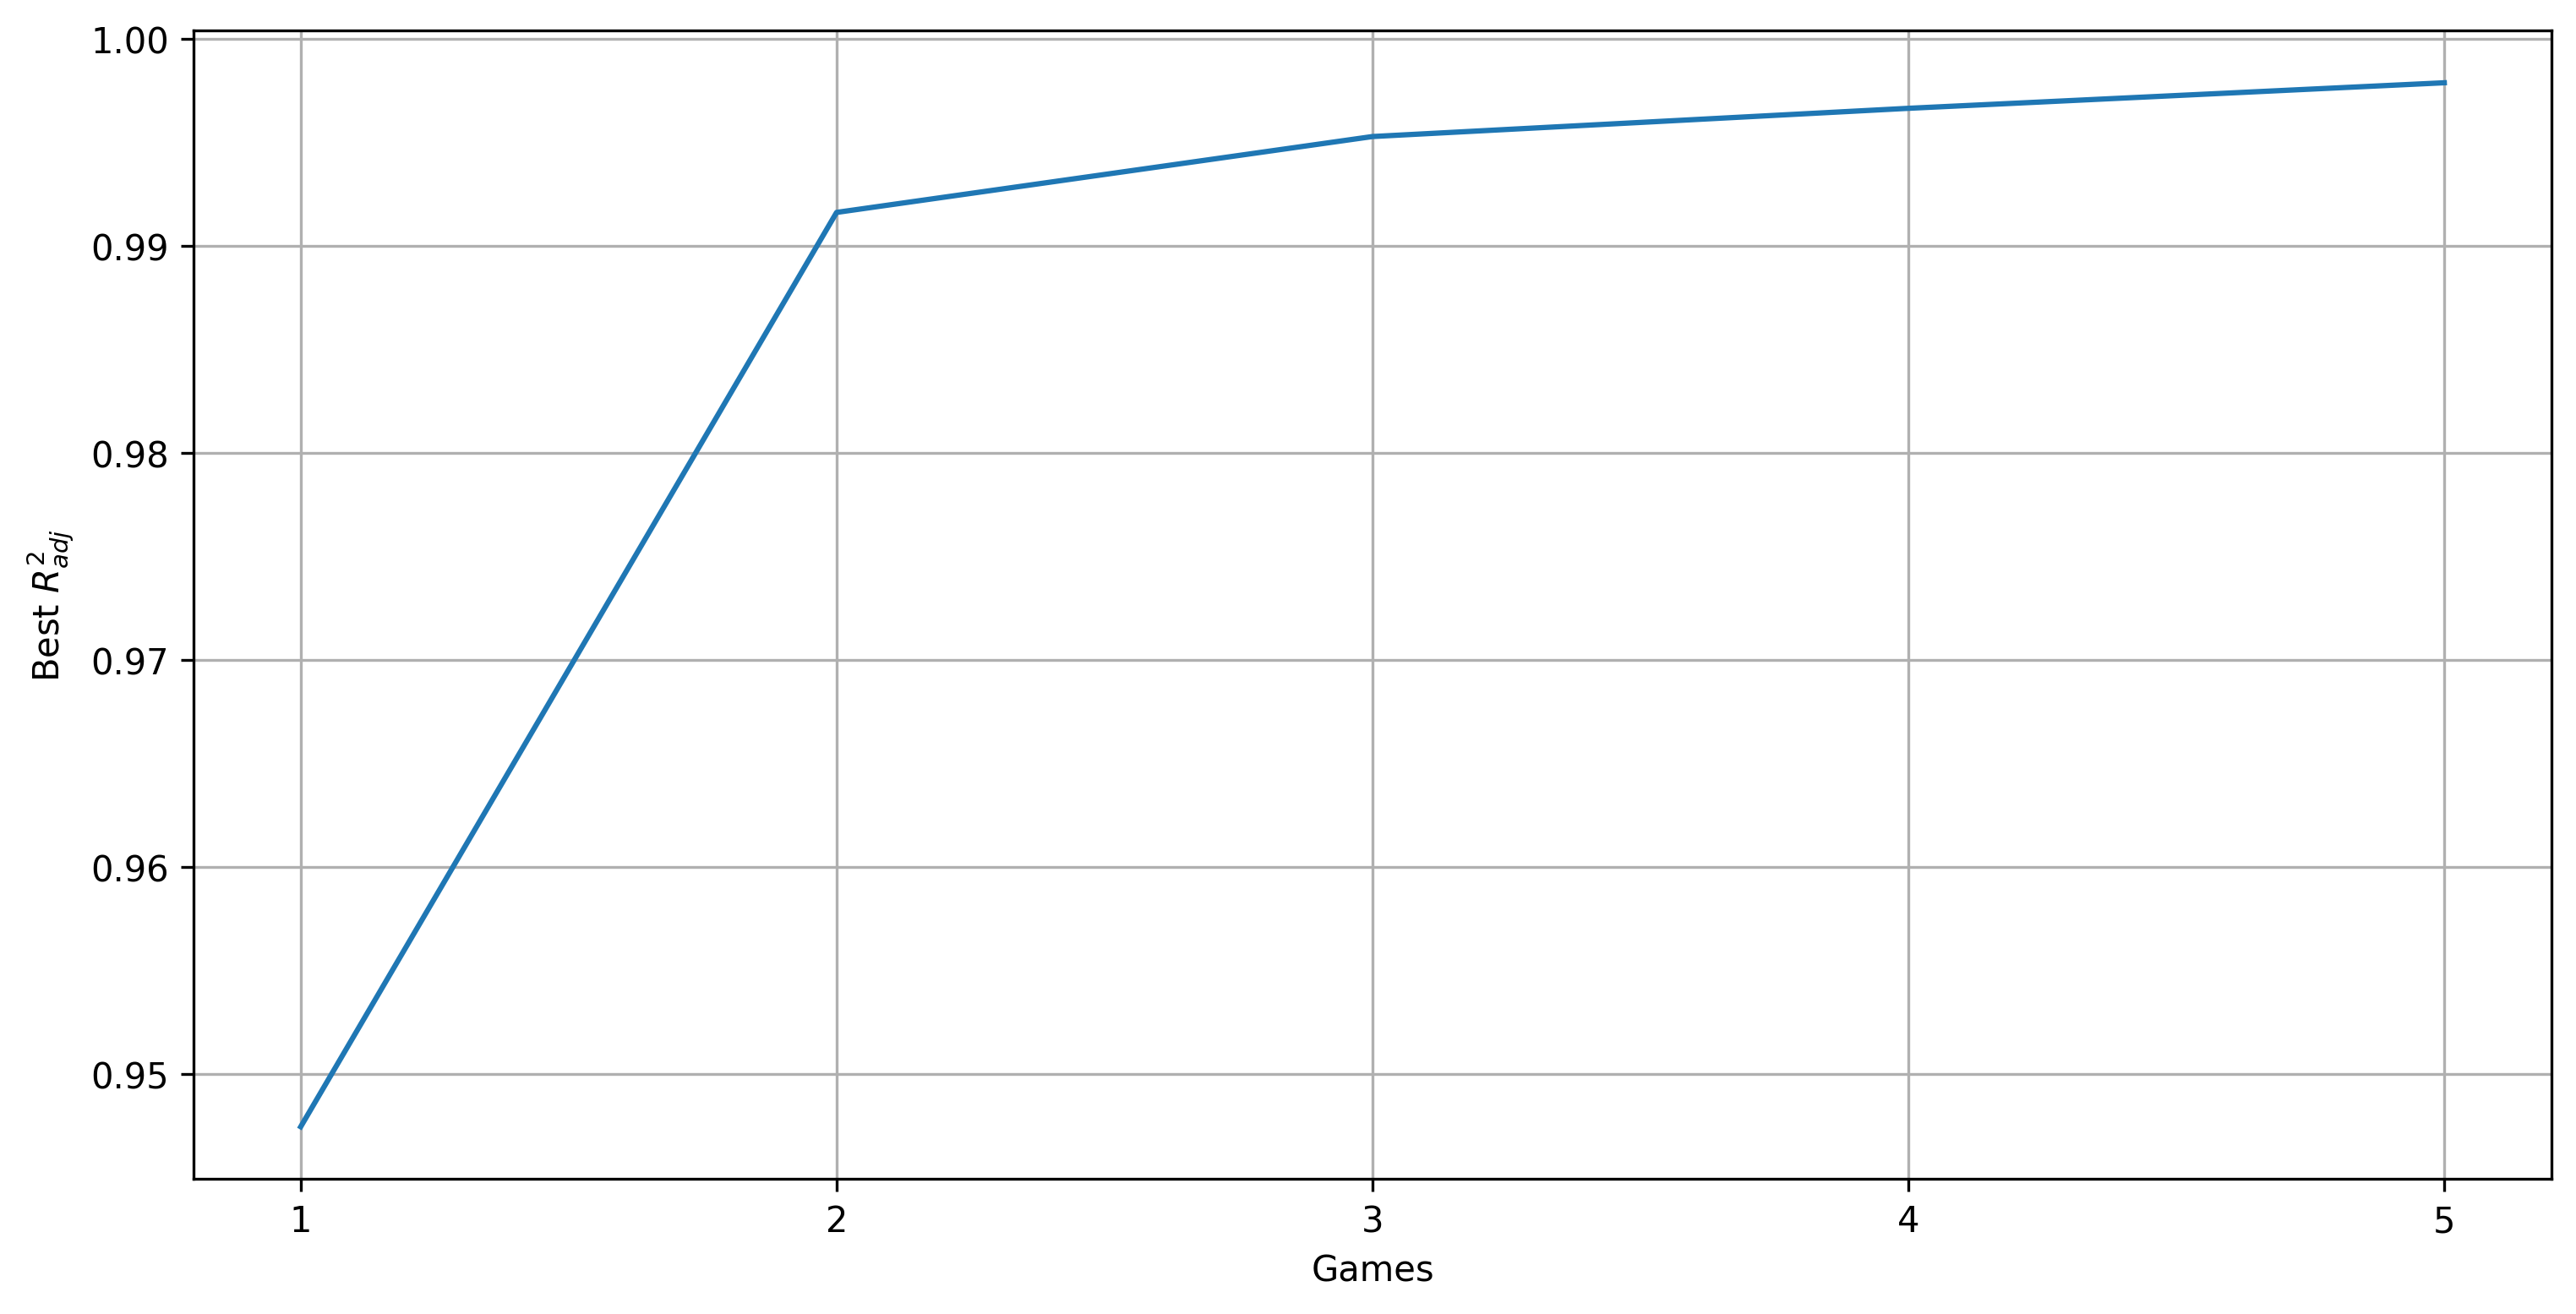

In [53]:
counter = 1
xs = []
ys = []
for name, games_subset in atari_subsets[:5]:
    lm, (X, y) = fit_model(games_subset, algo_scores, median_scores)
    xs.append(counter)
    
    r2 = lm.score(X, y)
    predicted_scores = lm.predict(X)
    
    SS_Residual = sum((y - predicted_scores) ** 2)
    SS_Total = sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (float(SS_Residual)) / SS_Total

    N = len(y)
    K = X.shape[1]
    adjusted_r2 = 1 - (1 - r_squared) * (N - 1) / (N - K - 1)
    
    ys.append(adjusted_r2)
    counter += 1
    
print(ys)

plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(xs, ys)
plt.xlabel("Games")
plt.ylabel("Best $R_{adj}^2$")
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()



# 4. Predicting all scores from just 5 games

Idea is to show that 90% of the information can be infered from 10% of the games

In [57]:
# given a subset predict all other scores
# try to show that 10% of the dataset contains 90% of the information.
for name, subset in atari_subsets[:3]:    
    
    print("-"*60)
    print(name)
    
    results = []
    rss = 0
    tss = 0
    for target in [game for game in canonical_57]:
    
        # train multiple regressor
        
        data = algo_scores[algo_scores["In57"]]
        data = algo_scores[algo_scores["train"]]
        data = algo_scores[[algo in good_algos for algo in algo_scores["Algorithm"]]]

        data = data.pivot_table(index='Algorithm', columns="Game", values="Normalized", fill_value=None)                
        
        
        X = data[list(subset)]
        y = data[target]
                
        mask = np.all(X.notna(), axis=1) & y.notna()

        X = X[mask]
        y = y[mask]
        
        # we need to normalize y due scale differences (otherwise a few games dominiate)
        y_orig = y.copy()
        
        transform = lambda x: x

        # alway use intercept for this one
        lm = sklearn.linear_model.LinearRegression(fit_intercept=True)
        lm.fit(transform(X), y)
                
        this_rss = np.sum((lm.predict(transform(X)) - y) ** 2)        
        this_tss = np.sum((y-np.mean(y)) ** 2)
        this_r2 = 1-(this_rss/this_tss)
        rss += this_rss
        tss += this_tss        
        
        #print(f"{target:<20} {this_rss:.2f}")
        
        # fit again for coef
        lm = sklearn.linear_model.LinearRegression(fit_intercept=True)
        lm.fit(transform(X), y_orig)
                                
        results.append((this_r2, target, lm.intercept_, lm.coef_))

    r2 = 1-(rss/tss)
    print(r2)

------------------------------------------------------------
Atari-1
0.6439549205779926
------------------------------------------------------------
Atari-2
0.6272945322375519
------------------------------------------------------------
Atari-3
0.7911227646883361


A2C + SIL: 124
A3C FF (1 day) hs: 86
A3C FF hs: 97
A3C LSTM hs: 134
Advantage Learning: 98
Agent57: 2153
Ape-X: 545
Best Learner: 64
Bootstrapped DQN: 140
C51 noop: 144
CGP: 95
DDQN (tuned) hs: 99
DDQN (tuned) noop: 111
DDQN+Pop-Art noop: 110
DQN hs: 83
DQN noop: 95
DreamerV2: 175
Duel hs: 127
Duel noop: 132
ES FF (1 hour) noop: 64
FirstReturn: 1690
Gorila: 89
Human: 95
IMPALA (deep): 251
IQN: 320
Laser No Sweep 200M: 530
Laser Shared Sweep 200M: 474
Laser Shared Sweep 50M: 408
MuZero: 2272
MuZero (Res2 Adam): 837
Nature DQN: 93
NoisyNet-Dueling: 228
POP3D: 72
Prior hs: 133
Prior noop: 154
Prior+Duel hs: 239
Prior+Duel noop: 240
QR-DQN-1: 277
R2D2: 2143
Rainbow 200M: 260
Random: 63
Reactor: 303
Reactor ND: 311
SARSA: 60
UCT: 245
[0.1193771657284054, 0.14172593327243788, 0.15833593859426698, 0.25272579712725185, 0.2824268472679603, 0.31541407986166314, 0.35762884638067616, 0.3694048366326538, 0.38666759792761807, 0.4251814749392322, 0.42944047694703846, 0.4308676867472955, 0.44008793459

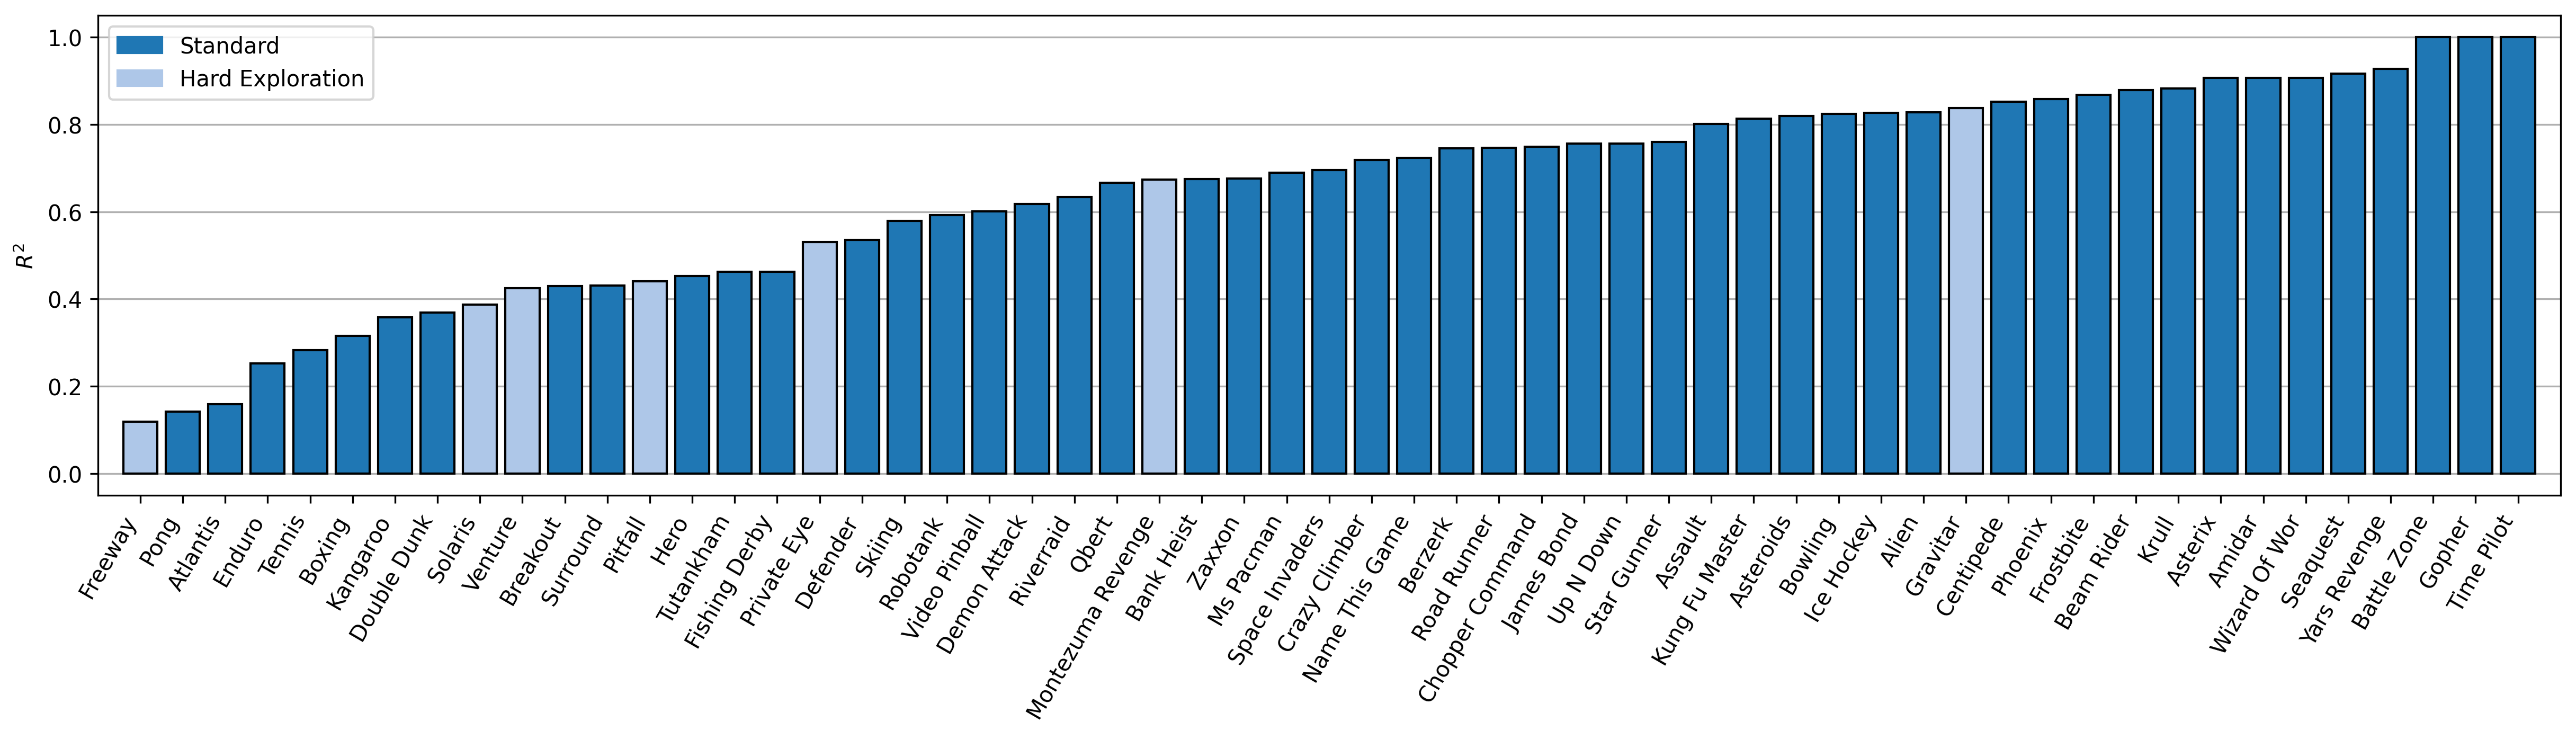

In [58]:

def all_game_median_predict(x):
    game_scores = []    
    for (r2, target, c, a) in results:                        
        game_scores.append(c + np.dot(x, a))
    return np.median(game_scores)
        

hard_exploration_games = [
    'Venture',
    "Solaris",
    "Private Eye",
    "Pitfall",
    "Montezuma Revenge",
    "Gravitar",
    "Freeway",
]

def game_color(game):    
    return cm(1) if game in hard_exploration_games else cm(0)

subset = ['battle zone', 'gopher', 'time pilot']
for algo in good_algos:    
    data = algo_scores[algo_scores["Algorithm"]==algo]
    data = data.pivot_table(index='Algorithm', columns="Game", values="Normalized", fill_value=None)                
    x = data[subset]
    x = np.asarray(x).reshape(3)    
    print(f"{algo}: {all_game_median_predict(x):.0f}")

cm = plt.get_cmap("tab20")
results.sort()
plt.figure(figsize=(20,4))
labels = [cap(y) for x,y,_,_ in results]
score = [x for x,y,_,_ in results]
print(score)
plt.xticks(rotation=60, ha="right")
plt.gca().grid(axis="y", zorder=0)
colors = [cm(1) if game in hard_exploration_games else cm(0) for game in labels]
plt.bar(labels, score, edgecolor='black', zorder=4, color=colors)
plt.ylim(-0.05,1.05)
plt.xlim(-1,57)
yticks = np.arange(0, 1.0+0.1, 0.1)
plt.ylabel("$R^2$")

colors = {'Standard':cm(0), 'Hard Exploration':cm(1)}
_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in _labels]
plt.legend(handles, _labels)

plt.show()

In [59]:
#export a table
results.sort(key=lambda x: x[1])
for r2, game, intercept, coef in results:
    coef_str = " & ".join([f"{b:.4f}" for a,b in enumerate(coef)])
    print(cap(game)+" & $"+str(round(intercept,2))+"+$ & $ \\textbf{S} \\cdot \\begin{bmatrix} " + coef_str + " \\end{bmatrix} $ \\\\")
    
    

Alien & $-325.43+$ & $ \textbf{S} \cdot \begin{bmatrix} 4.2283 & 0.0795 & -0.1172 \end{bmatrix} $ \\
Amidar & $5.84+$ & $ \textbf{S} \cdot \begin{bmatrix} 0.4942 & 0.0055 & 0.0098 \end{bmatrix} $ \\
Assault & $488.4+$ & $ \textbf{S} \cdot \begin{bmatrix} 1.3805 & 0.3471 & 0.4469 \end{bmatrix} $ \\
Asterix & $-241.57+$ & $ \textbf{S} \cdot \begin{bmatrix} 1.6285 & 0.7374 & 0.1726 \end{bmatrix} $ \\
Asteroids & $1.17+$ & $ \textbf{S} \cdot \begin{bmatrix} -0.1577 & 0.0159 & 0.0446 \end{bmatrix} $ \\
Atlantis & $3625.48+$ & $ \textbf{S} \cdot \begin{bmatrix} -0.8237 & 0.1260 & 0.2349 \end{bmatrix} $ \\
Bank Heist & $67.9+$ & $ \textbf{S} \cdot \begin{bmatrix} -0.3252 & -0.0047 & 0.1142 \end{bmatrix} $ \\
Battle Zone & $-0.0+$ & $ \textbf{S} \cdot \begin{bmatrix} 1.0000 & -0.0000 & 0.0000 \end{bmatrix} $ \\
Beam Rider & $-6.8+$ & $ \textbf{S} \cdot \begin{bmatrix} 0.3451 & 0.0410 & 0.0419 \end{bmatrix} $ \\
Berzerk & $-78.26+$ & $ \textbf{S} \cdot \begin{bmatrix} 1.4615 & 0.1133 & -0.0383 

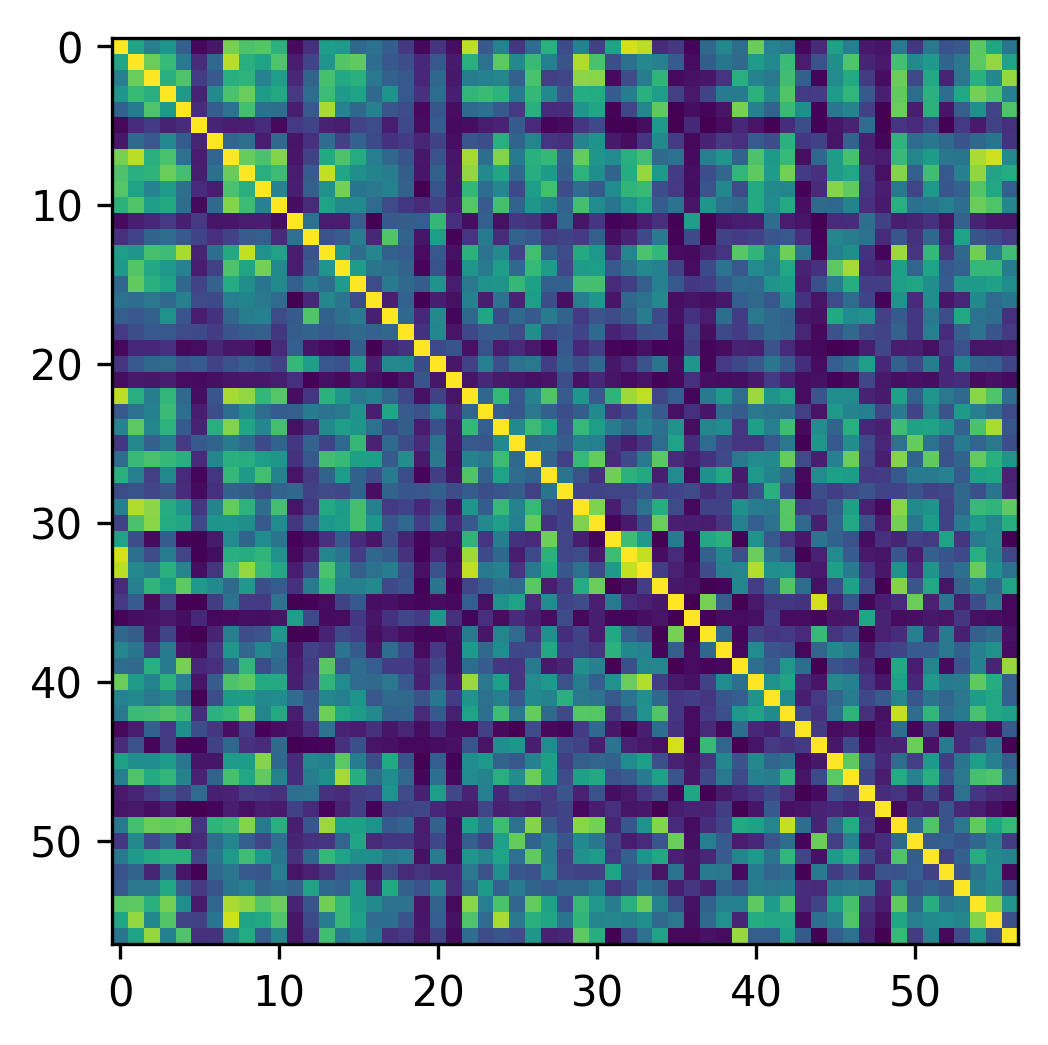

In [60]:
# Show which games correlate with which other games...
# given a subset predict all other scores
# try to show that 10% of the dataset contains 90% of the information.

table = np.zeros([57, 57])

for subset in canonical_57:    
    subset = [subset]
    for target in [game for game in canonical_57]:
            
        #data = algo_scores[algo_scores["train"]]
        data = algo_scores

        data = data.pivot_table(index='Algorithm', columns="Game", values="Normalized", fill_value=None)                
        
        X = data[list(subset)]
        y = data[target]
                
        mask = np.all(X.notna(), axis=1)
        X = X[mask]
        y = y[mask]
        mask = y.notna()        
        X = X[mask]
        y = y[mask]        
        
        # we need to normalize y due scale differences (otherwise a few games dominiate)
        y = y - np.mean(y)        
        y = y / np.std(y)                

        # alway use intercept for this one
        lm = sklearn.linear_model.LinearRegression(fit_intercept=True)
        lm.fit(X, y)
                
        this_rss = np.sum((lm.predict(X) - y) ** 2)        
        this_tss = np.sum((y-np.mean(y)) ** 2)        
        this_r2 = 1-(this_rss/this_tss)
        target_index = canonical_57.index(target)
        pred_index = canonical_57.index(subset[0])
        table[pred_index, target_index] = this_r2                

plt.imshow(table)
plt.show()

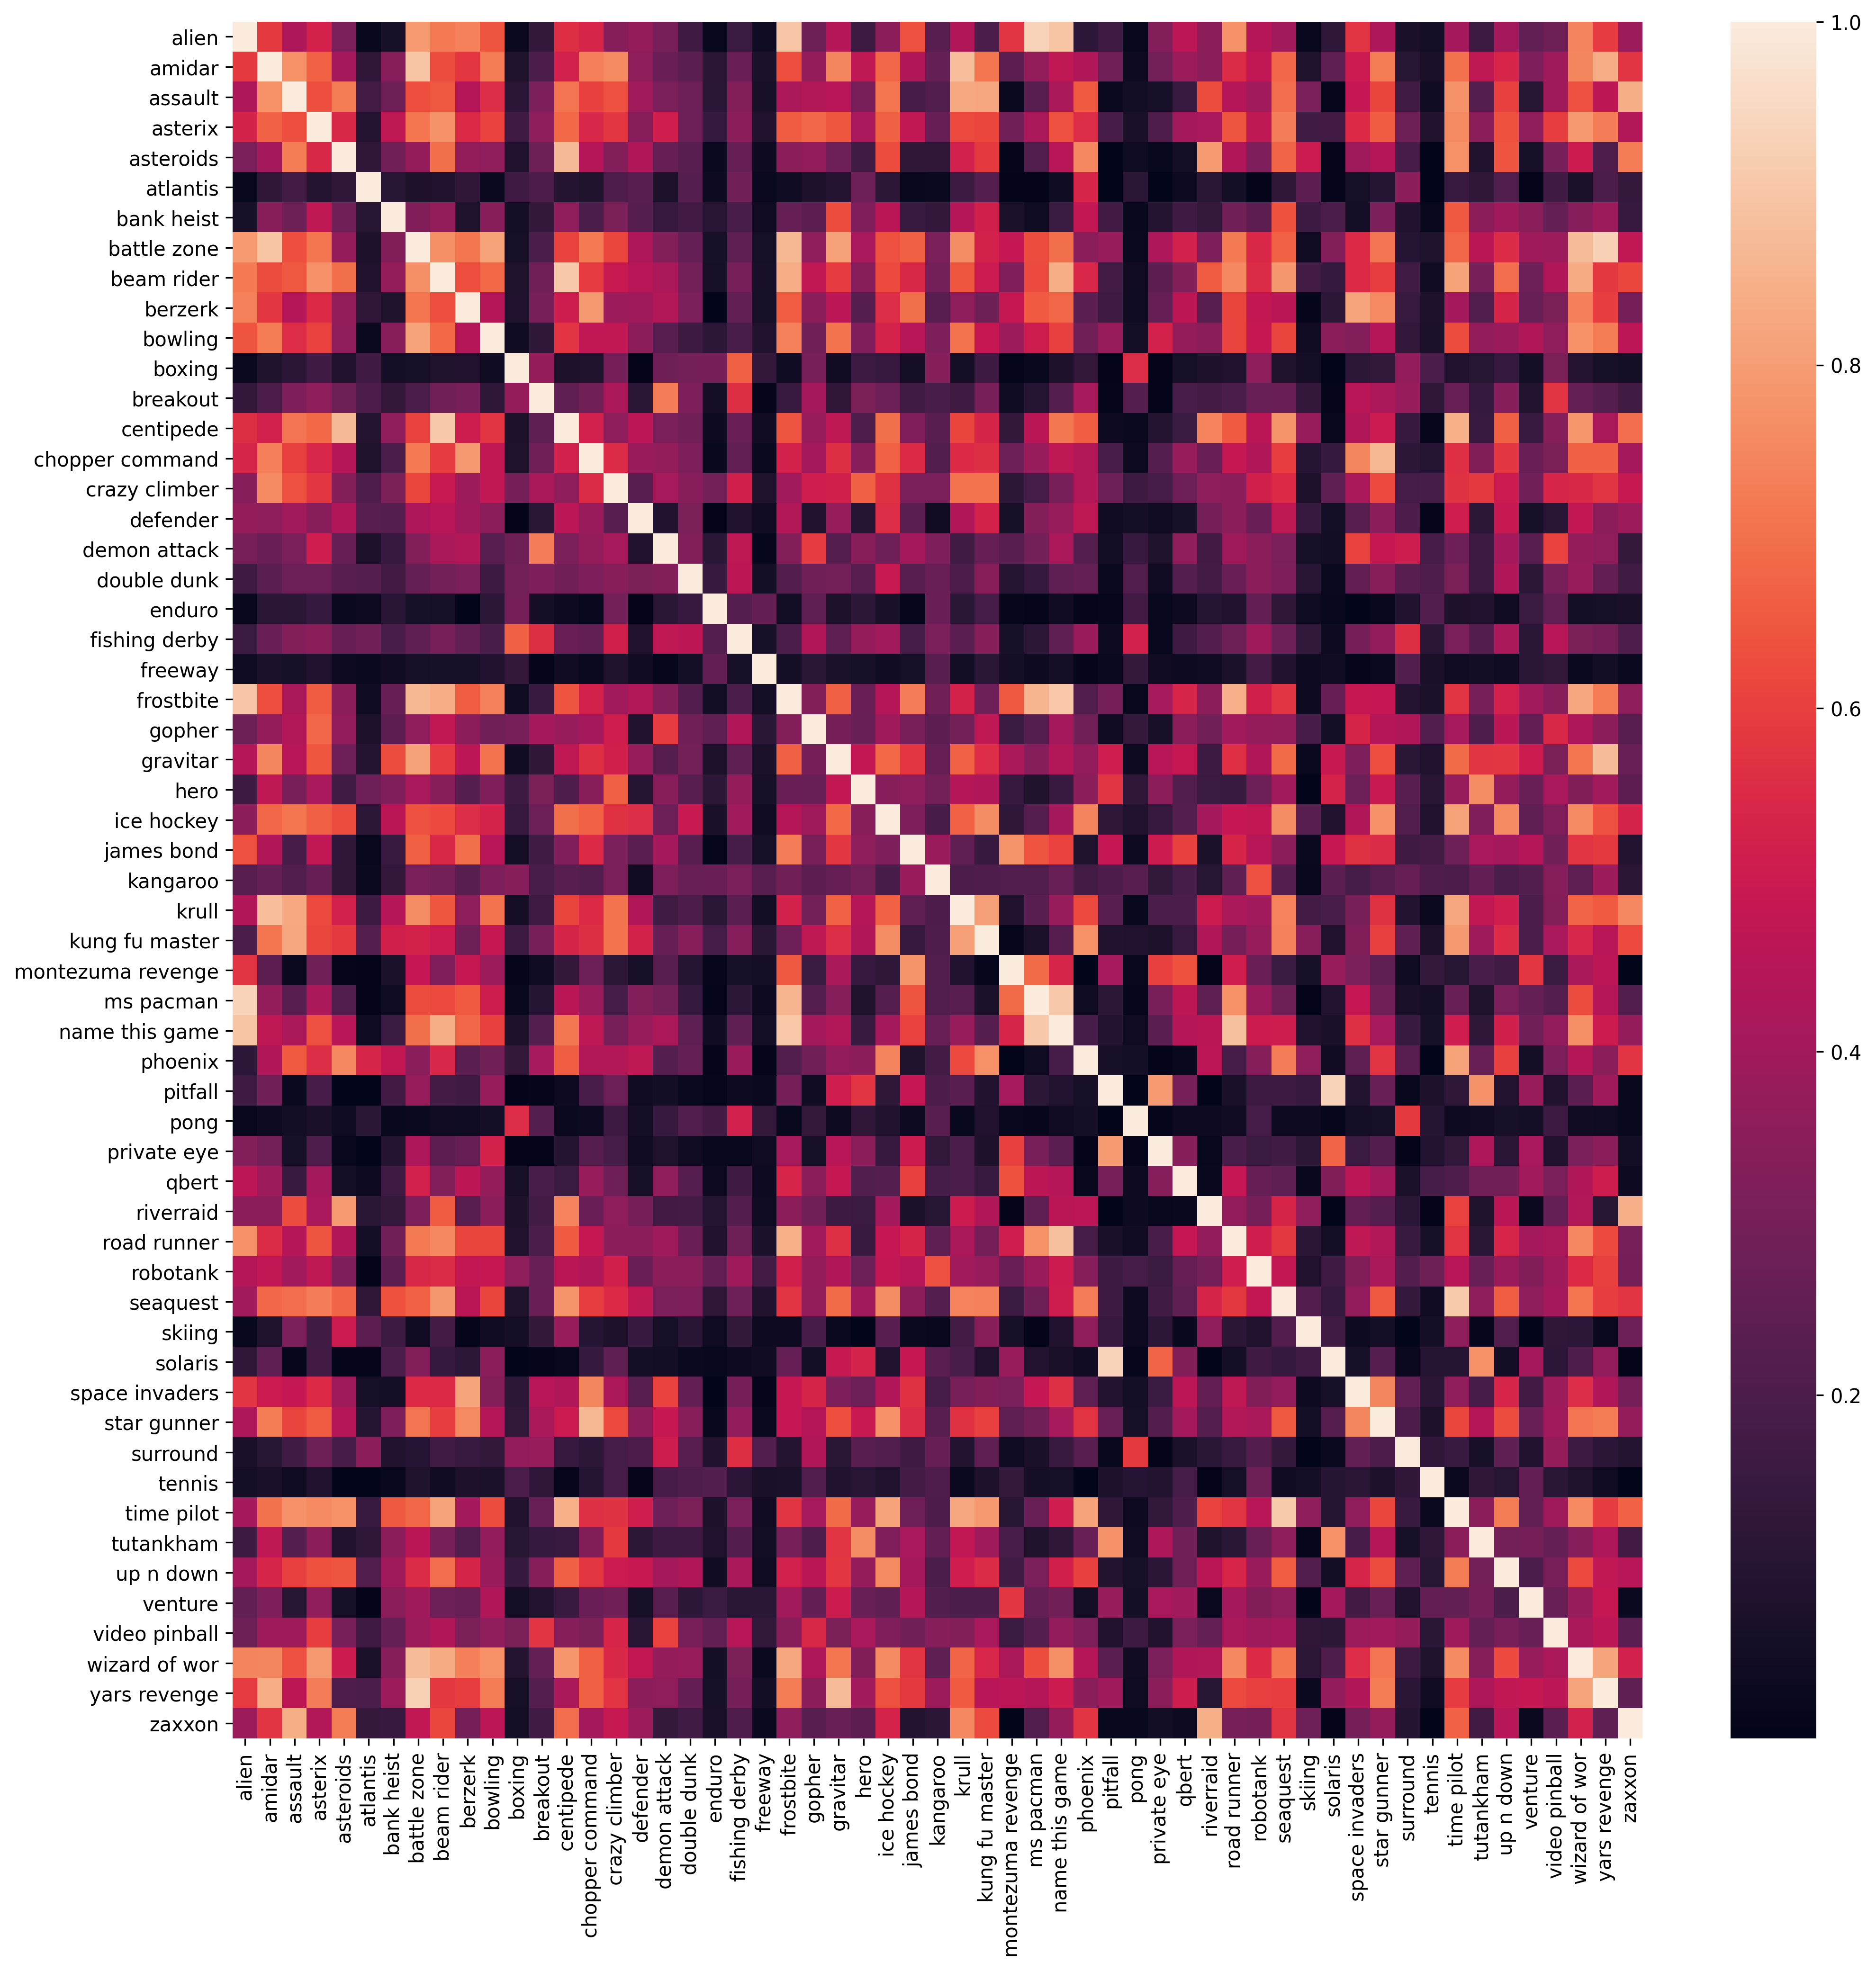

In [61]:
plt.figure(figsize=(16,16))
corr = table
labels = canonical_57
sns.heatmap(corr, 
            xticklabels=labels,
            yticklabels=labels)
plt.show()

/home/matthew/anaconda3/envs/ppo/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


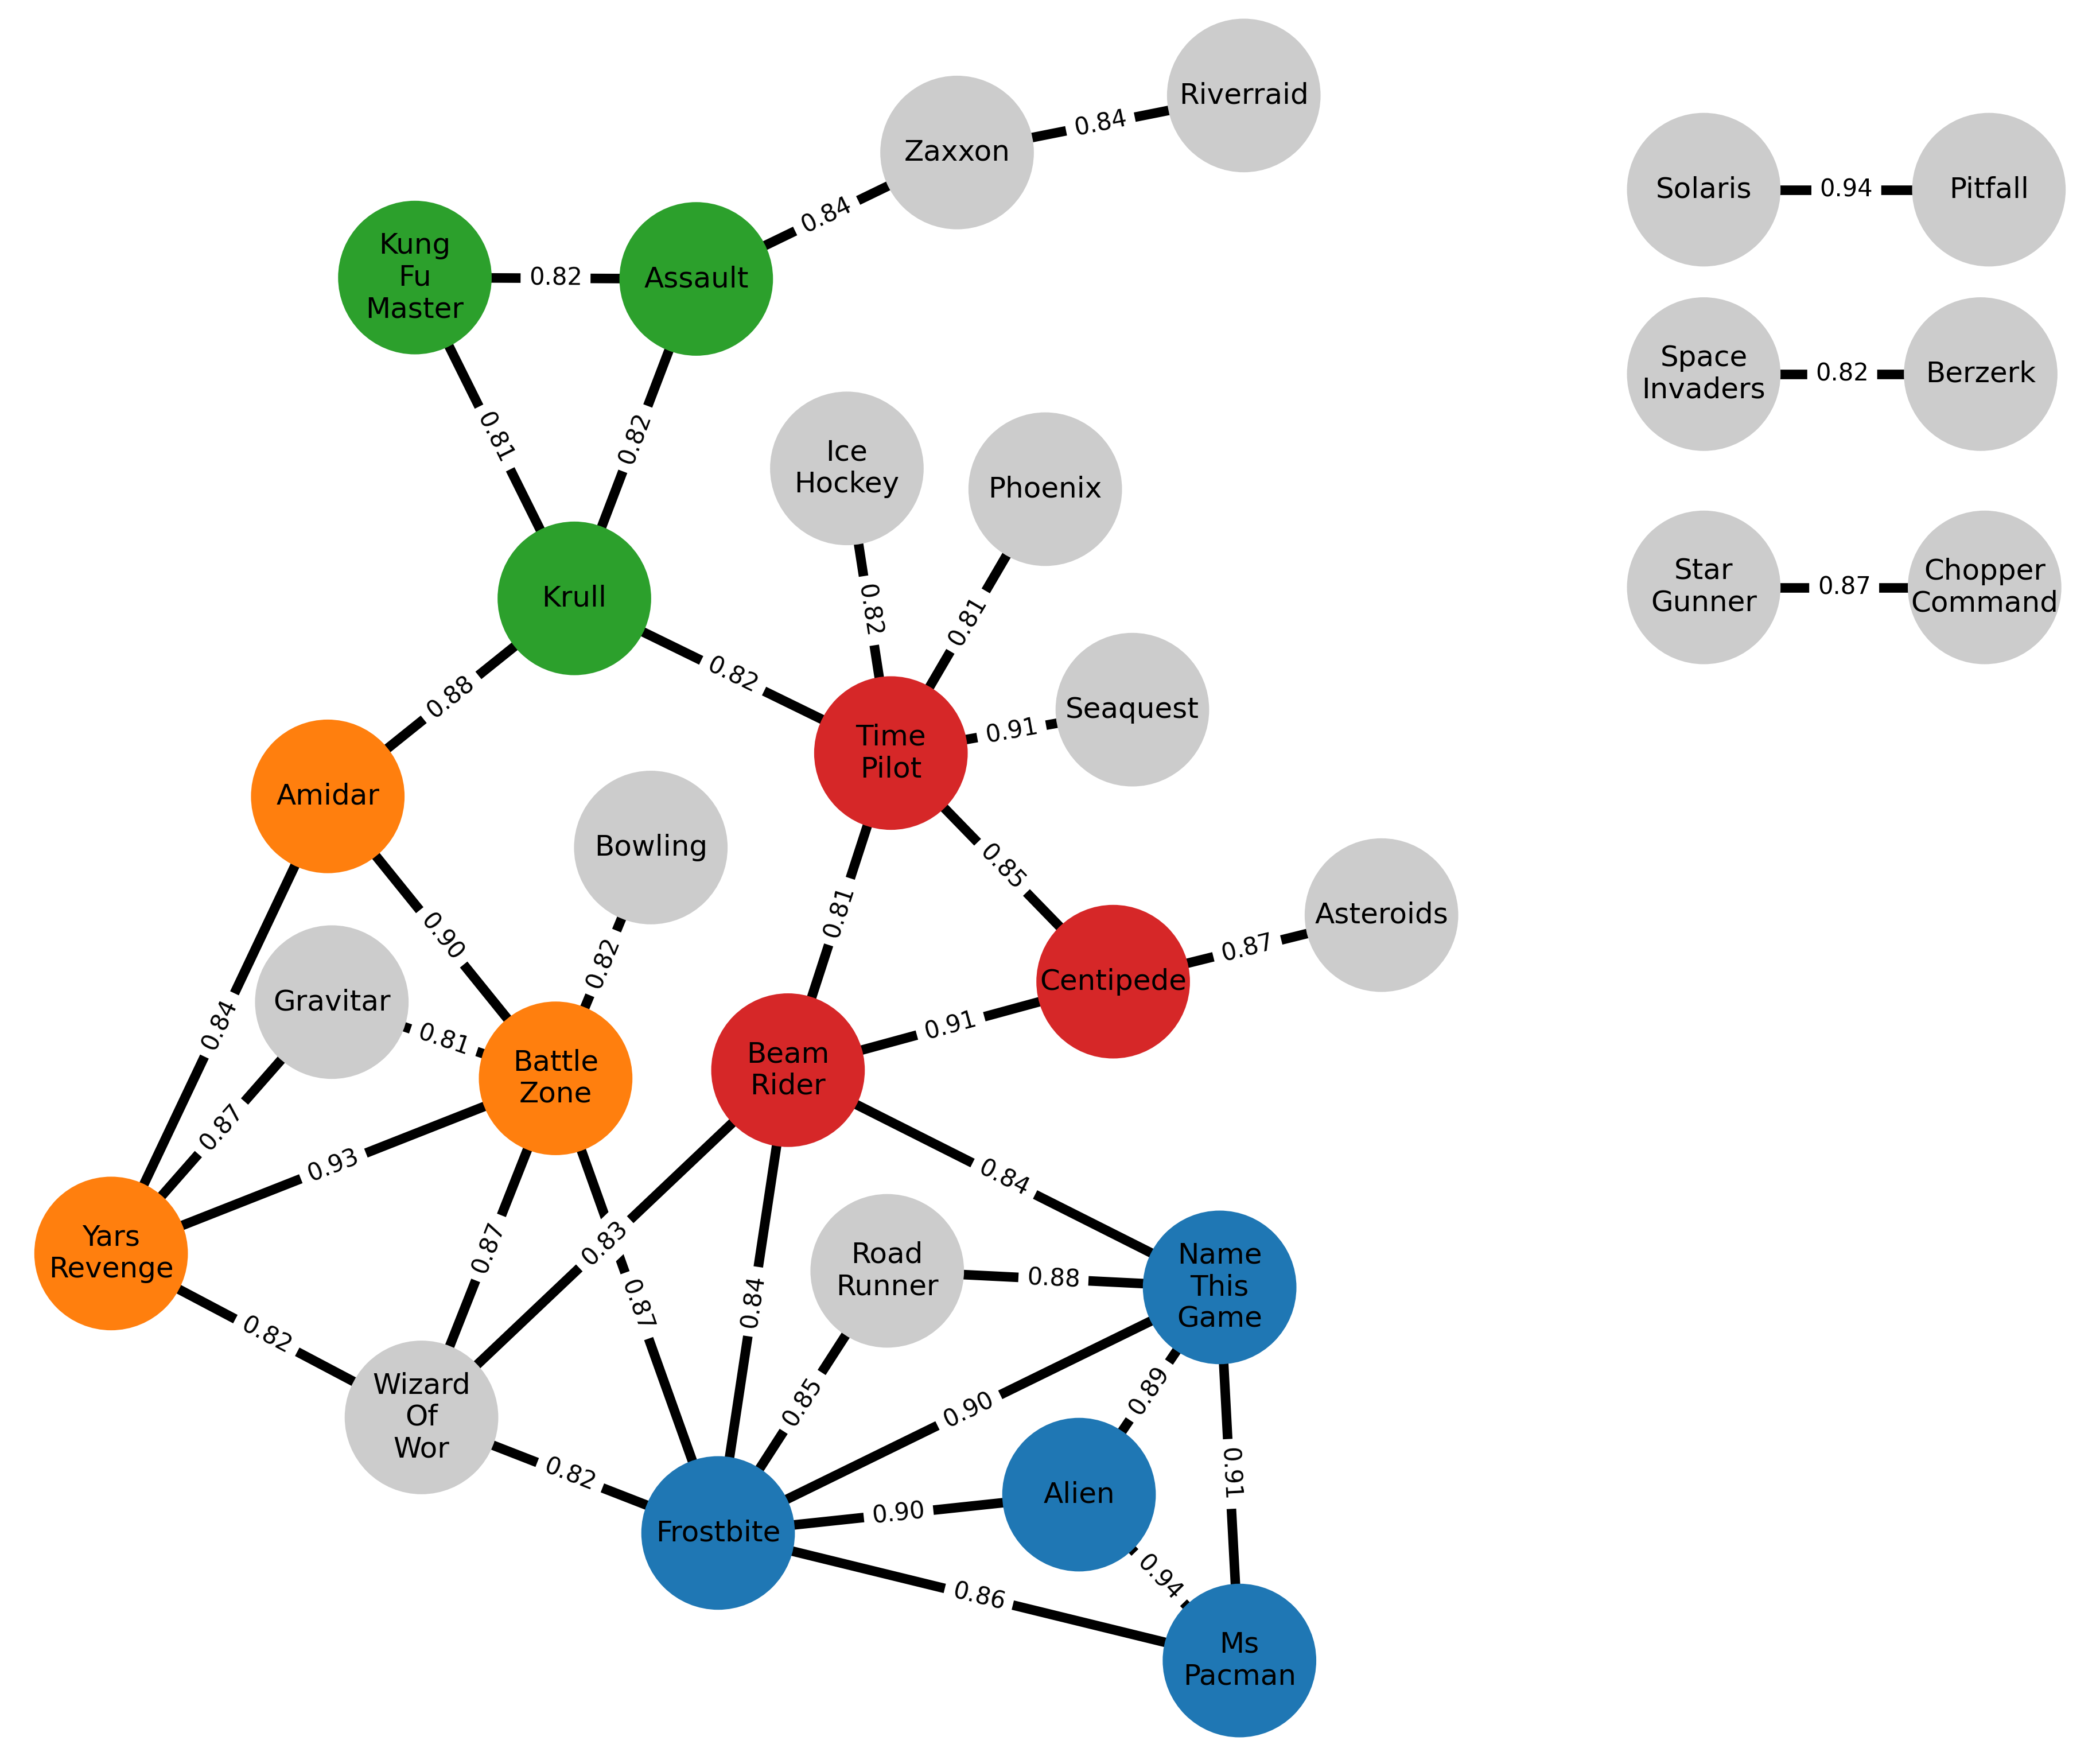

In [18]:
cm = plt.get_cmap("tab10")


new_pos = {
    'Frostbite': np.asarray([0.25941142, 0.27839204]),
    'Asteroids': np.asarray([0.65689261, 0.58941164]),
    'Centipede': np.asarray([0.4961192 , 0.55590778]),
    'Time\nPilot': np.asarray([0.36295373, 0.67098469]),
    'Yars\nRevenge': np.asarray([-0.10429831,  0.41908318]),
    'Amidar': np.asarray([0.02553057, 0.64917872]),
    'Ms\nPacman': np.asarray([0.57180555, 0.21417751]),
    'Riverraid': np.asarray([0.5743928 , 1.00200813]),
    'Ice\nHockey': np.asarray([0.33656553, 0.81428291]),
    'Bowling': np.asarray([0.21909124, 0.62343015]),
    'Kung\nFu\nMaster': np.asarray([0.07773027, 0.91034837]),
    'Battle\nZone': np.asarray([0.16205412, 0.50724757]),
    'Name\nThis\nGame': np.asarray([0.55992462, 0.40201481]),
    'Zaxxon': np.asarray([0.40259256, 0.97329302]),
    'Krull': np.asarray([0.17328182, 0.74885786]),
    'Road\nRunner': np.asarray([0.36074051, 0.41034717]),
    'Seaquest': np.asarray([0.50762998, 0.69283459]),
    'Wizard\nOf\nWor': np.asarray([0.08168317, 0.33655722]),
    'Alien': np.asarray([0.47566838, 0.29768334]),
    'Phoenix': np.asarray([0.45541877, 0.8038171 ]),
    'Beam\nRider': np.asarray([0.30130282, 0.511369  ]),
    'Gravitar': np.asarray([0.02794759, 0.54560654]),
    'Assault': np.asarray([0.24629607, 0.90965763]),
    'Solaris':           np.asarray([0.85000000, 1.05458938-0.1]),
    'Pitfall':           np.asarray([1.02085719, 1.05458938-0.1]),
    'Chopper\nCommand':  np.asarray([1.01828169, 0.85437687-0.1]),
    'Star\nGunner':      np.asarray([0.85000000, 0.85437687-0.1]),
    'Space\nInvaders':   np.asarray([0.85000000, 0.96175133-0.1]),
    'Berzerk':           np.asarray([1.01593686, 0.96175133-0.1])
}

def format_name(x):
    return "\n".join([cap(y) for y in x.split(" ")])
            
G = nx.Graph()

edge_labels = {}

def in_cluster(game, x):
    
    clusters = [
        [],
        ["alien", "frostbite", "mspacman", "namethisgame"],
        ["amidar", "battlezone", "yarsrevenge"],
        ["assault", "krull", "kungfumaster"],
        #["battlezone", "brostbite", "wizardofwor"],
        #["battlezone", "gravitar", "yarsrevenge"],
        ["beamrider", "centipede", "timepilot"],
        #["frostbite", "namethisgame", "roadrunner"],
    ]
    game = "".join(c for c in game.lower() if c in "abcdefghijklmnopqrstuvwxyz")    
    return game in clusters[x]        

def get_game_color(game):
    for c in range(1,4+1):
        if in_cluster(game, c):
            return cm(c-1)
    return (0.8,0.8,0.8)

for i in range(57):
    for j in range(i+1, 57):        
        if table[i,j] > 0.8:            
            
            a = format_name(canonical_57[i])
            b = format_name(canonical_57[j])            
                         
            G.add_node(a)
            G.add_node(b)            
            G.add_edge(a, b, length=1.1-table[i,j])
            edge_labels[(a,b)] = "{:.2f}".format(table[i,j])

pos = nx.spring_layout(G, weight='length', k=0.5, seed=2)
#pos = nx.planar_layout(G)
game_colors = [get_game_color(format_name(game)) for game in G.nodes]

options = {
    "node_color": game_colors,
    "edge_color": 'black',
    "node_size": 4000,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,    
}
plt.figure(figsize=(12,10))
nx.draw(G, new_pos, **options)
nx.draw_networkx_edge_labels(G, new_pos, edge_labels=edge_labels)
plt.show()

In [19]:
# plt.ion()
# %matplotlib notebook
# import netgraph 
# plot_instance = netgraph.InteractiveGraph(
#     graph=G, 
#     node_data=G.nodes, 
#     edge_data=G.edges, 
#     node_layout=new_pos
# )

In [62]:
mask = table > 0.80
# plt.imshow(mask)
# plt.show()

def largest_cluster(current_cluster, i:int):
    if i >= 57:
        return current_cluster
    if i in current_cluster:
        return largest_cluster(current_cluster, i+1)
    # check if we match
    if all(mask[index, i] for index in current_cluster):
        # try with and without
        with_game = largest_cluster([i]+current_cluster, 0)
        without_game = largest_cluster(current_cluster, i+1)
        if len(with_game) >= len(without_game): 
            return with_game
        else:
            return without_game
    else:
        return largest_cluster(current_cluster, i+1)
        
clusters = []
for i in range(57):
    cluster = largest_cluster([i], 0)
    cluster.sort()
    if len(cluster) > 1:
        clusters.append(tuple(i for i in cluster))
clusters = list(set(clusters))
clusters.sort()
for cluster in clusters:
    games_in_cluster = ", ".join([cap(canonical_57[x]) for x in cluster])    
    print(games_in_cluster)


Alien, Frostbite, Ms Pacman, Name This Game
Amidar, Battle Zone, Yars Revenge
Assault, Krull, Kung Fu Master
Assault, Zaxxon
Asteroids, Centipede
Battle Zone, Bowling
Battle Zone, Frostbite, Wizard Of Wor
Battle Zone, Gravitar, Yars Revenge
Beam Rider, Centipede, Time Pilot
Berzerk, Space Invaders
Chopper Command, Star Gunner
Frostbite, Name This Game, Road Runner
Ice Hockey, Time Pilot
Phoenix, Time Pilot
Pitfall, Solaris
Riverraid, Zaxxon
Seaquest, Time Pilot


## Distance calcuation
Use 1-r^2 for distance, but min over transpose to make it symetric

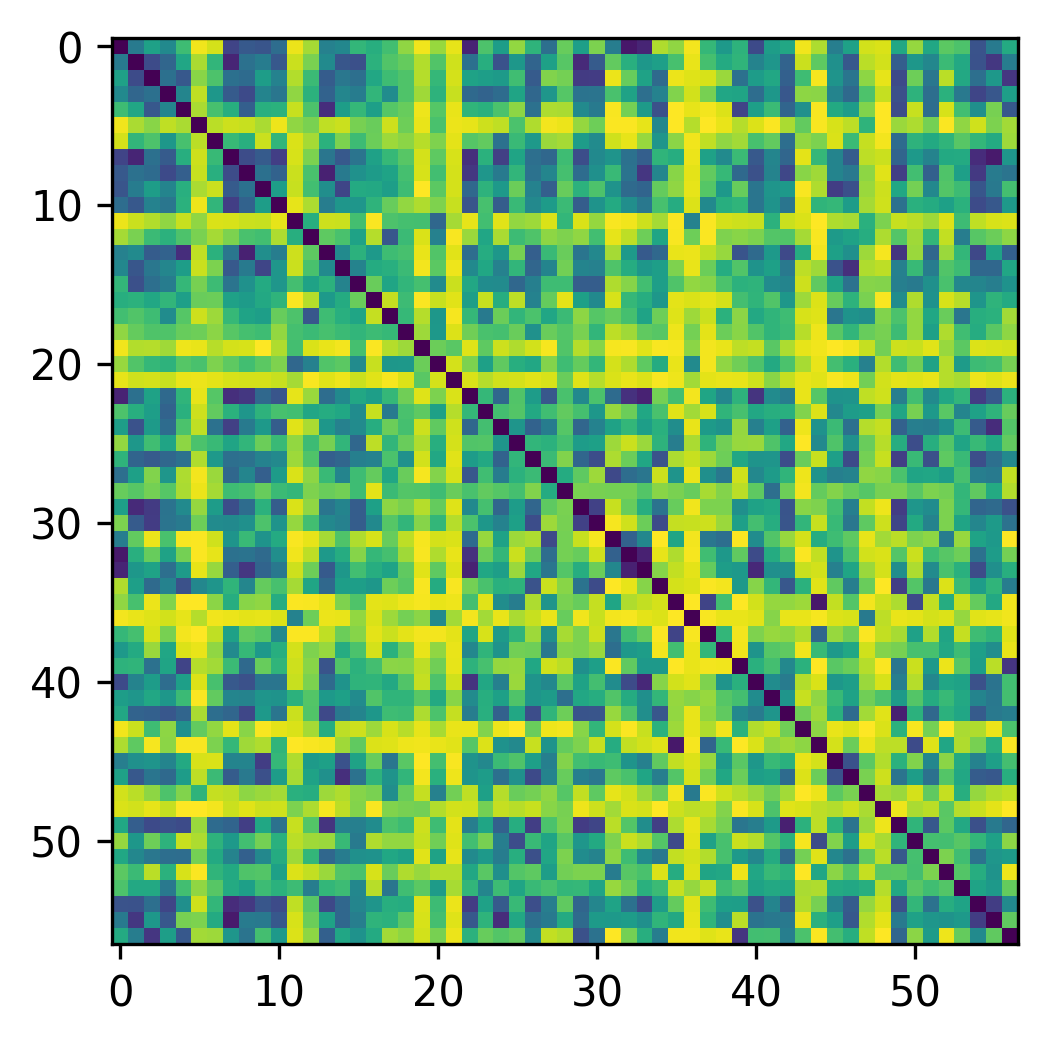

In [22]:
from sklearn import cluster, manifold

distance = 1-np.minimum(table, table.transpose())
plt.imshow(distance)
plt.show()

In [23]:
## Well paired games

In [24]:
for i in range(57):
    for j in range(57):
        if j >= i:
            continue        
        if distance[i,j] < 0.1:
            print(f"{canonical_57[i]:<20} {canonical_57[j]:<20} {distance[i,j]:.2f}")

centipede            beam rider           0.09
frostbite            alien                0.10
ms pacman            alien                0.06
name this game       frostbite            0.10
name this game       ms pacman            0.09
solaris              pitfall              0.06
time pilot           seaquest             0.09
yars revenge         battle zone          0.07


## Clustering Clustering


In [25]:
 ac = sklearn.cluster.AgglomerativeClustering(n_clusters=5)
ac.fit(distance)
print(ac.labels_)
for i in range(5):
    print(f"{i}:",end='')
    for game, label in zip(canonical_57, ac.labels_):
        if label == i:
            print(game,end=' ')
    print()

[1 3 3 1 3 2 3 1 1 1 1 2 4 3 1 3 3 4 4 2 4 2 1 4 1 0 3 0 4 3 3 0 1 1 3 0 2
 0 0 3 1 4 3 2 0 1 1 2 2 3 0 3 0 4 1 1 3]
0:hero james bond montezuma revenge pitfall private eye qbert solaris tutankham venture 
1:alien asterix battle zone beam rider berzerk bowling chopper command frostbite gravitar ms pacman name this game road runner space invaders star gunner wizard of wor yars revenge 
2:atlantis boxing enduro freeway pong skiing surround tennis 
3:amidar assault asteroids bank heist centipede crazy climber defender ice hockey krull kung fu master phoenix riverraid seaquest time pilot up n down zaxxon 
4:breakout demon attack double dunk fishing derby gopher kangaroo robotank video pinball 


/home/matthew/anaconda3/envs/ppo/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


## TSNE

**Notes**
* Not a big fan of TSNE
* Noesn't look good, try again with MDS

In [26]:
tsne = sklearn.manifold.TSNE(metric="precomputed", square_distances='legacy')
embeddings = tsne.fit_transform(distance)


/home/matthew/anaconda3/envs/ppo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


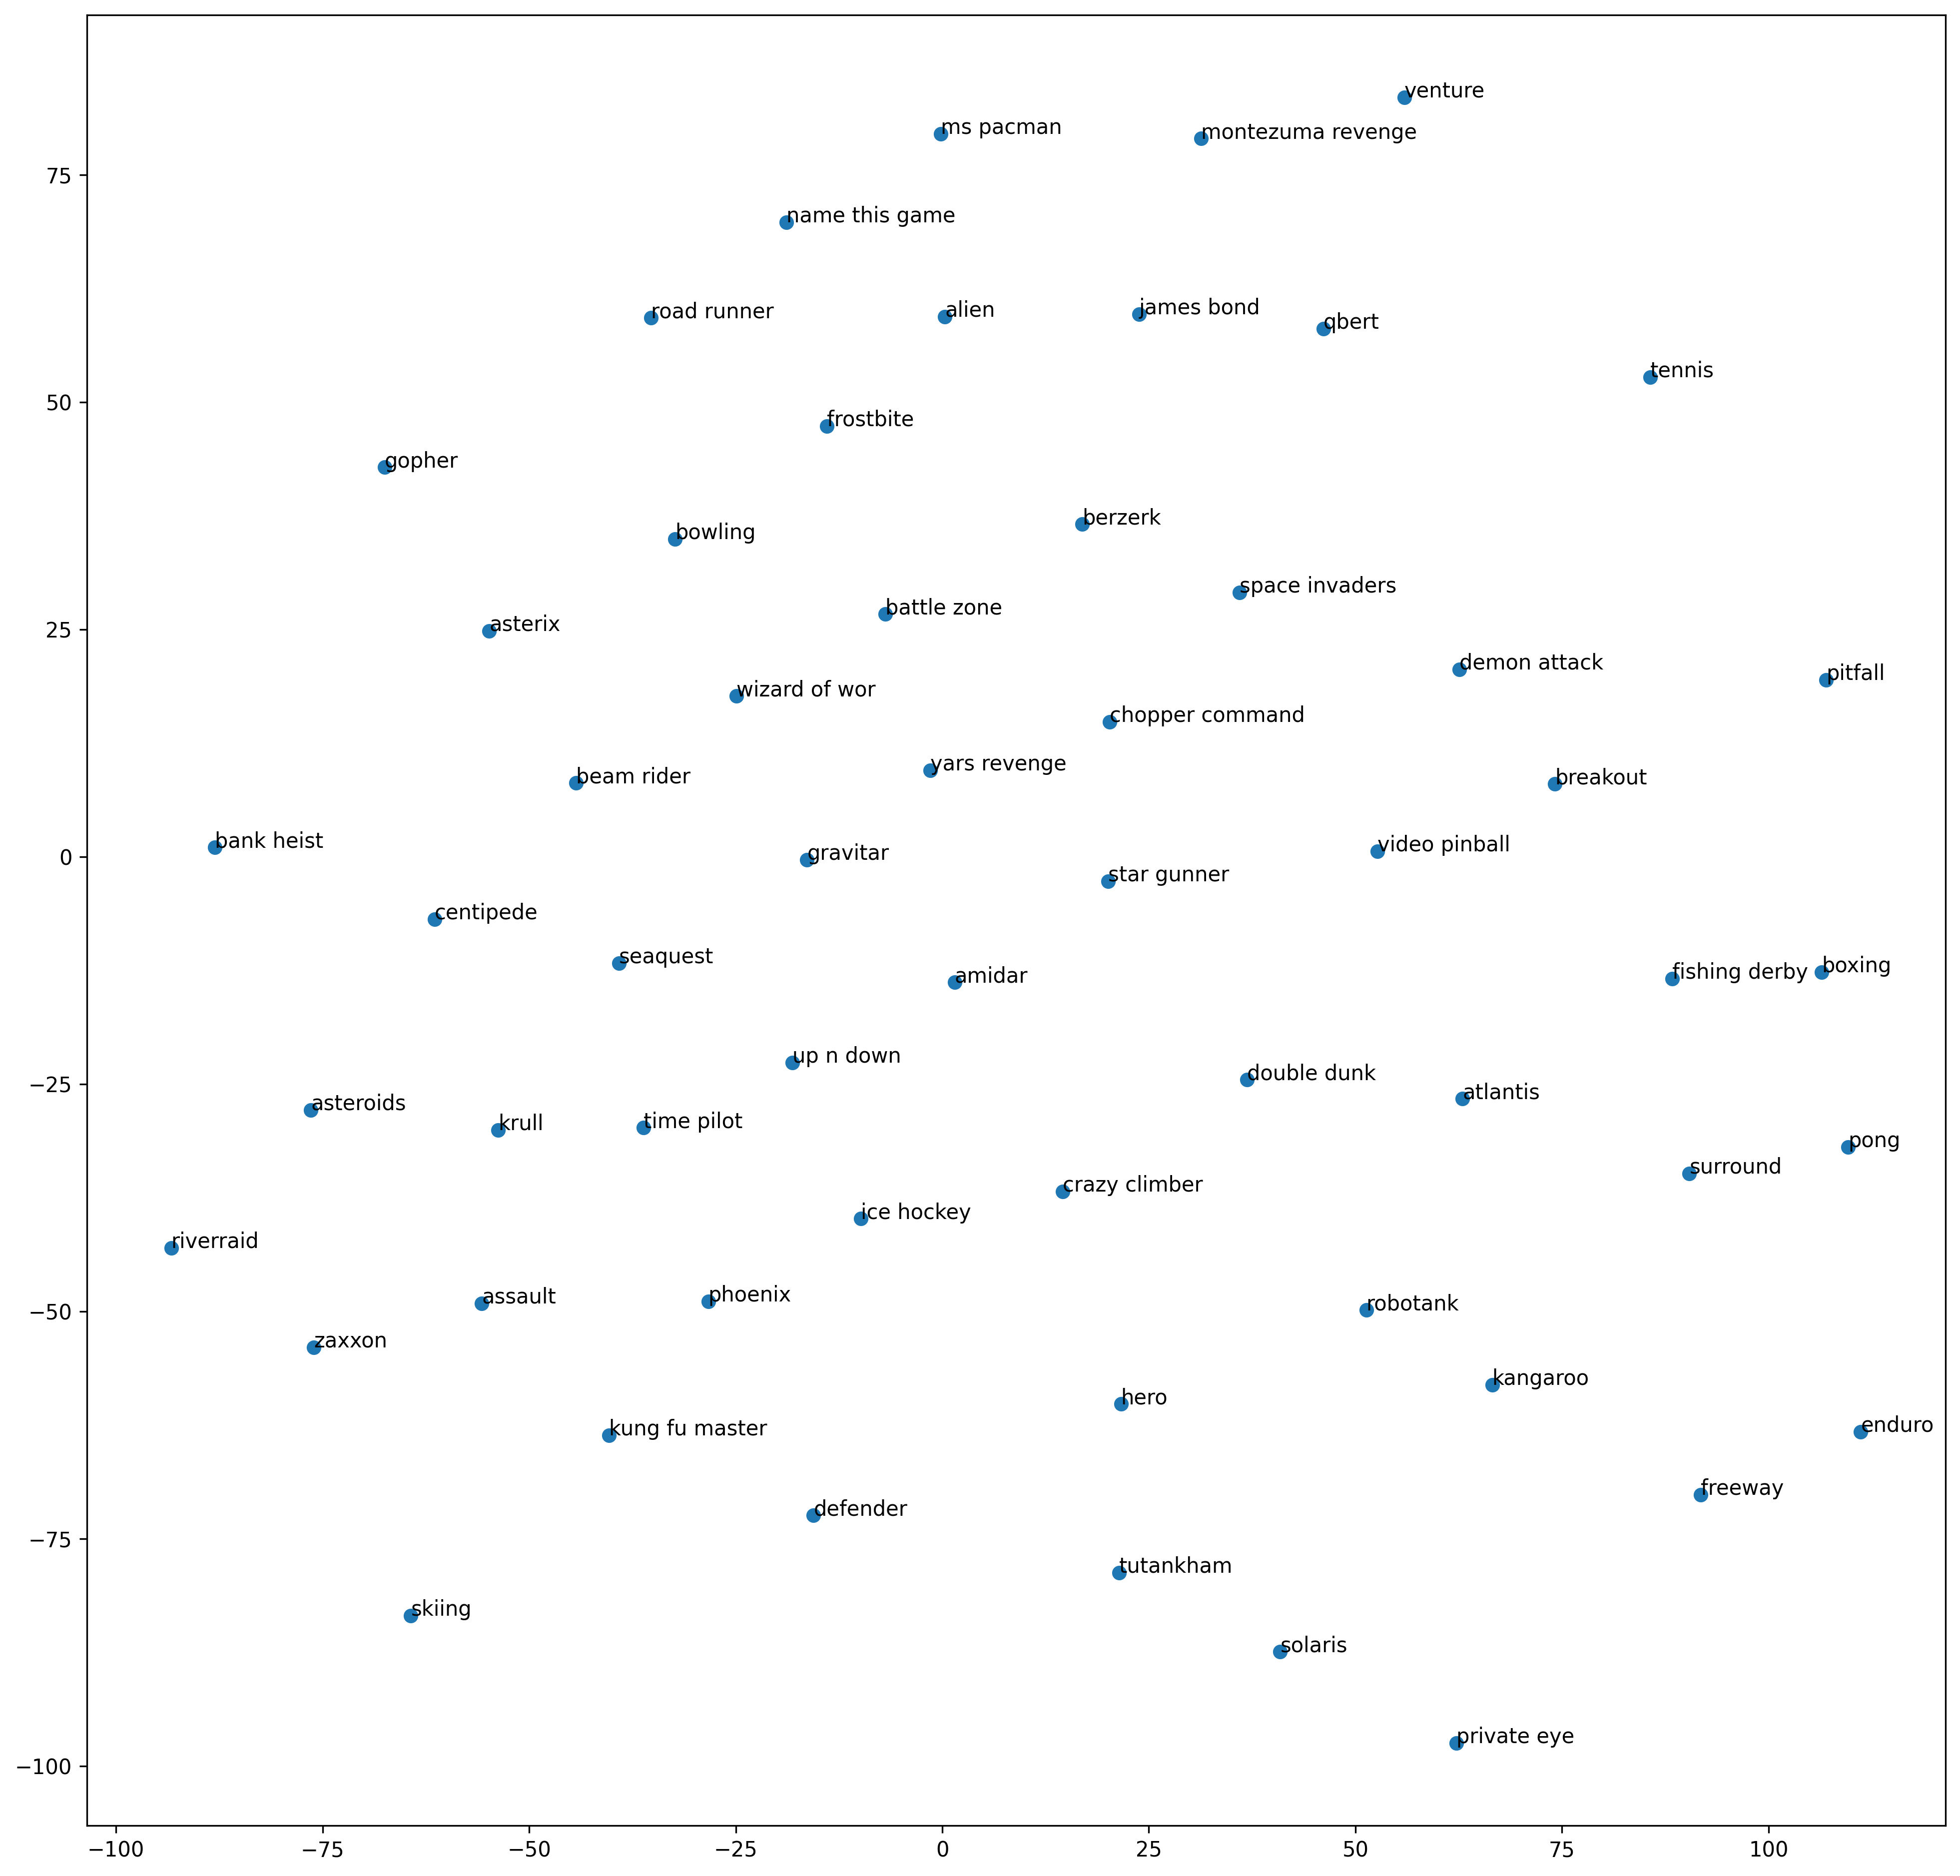

In [27]:
plt.figure(figsize=(16,16))
xs = [x for x,y in embeddings]
ys = [y for x,y in embeddings]
plt.scatter(xs, ys)
ax = plt.gca()
for i, txt in enumerate(canonical_57):    
    ax.annotate(txt, (xs[i], ys[i]))

plt.show()


## MDS


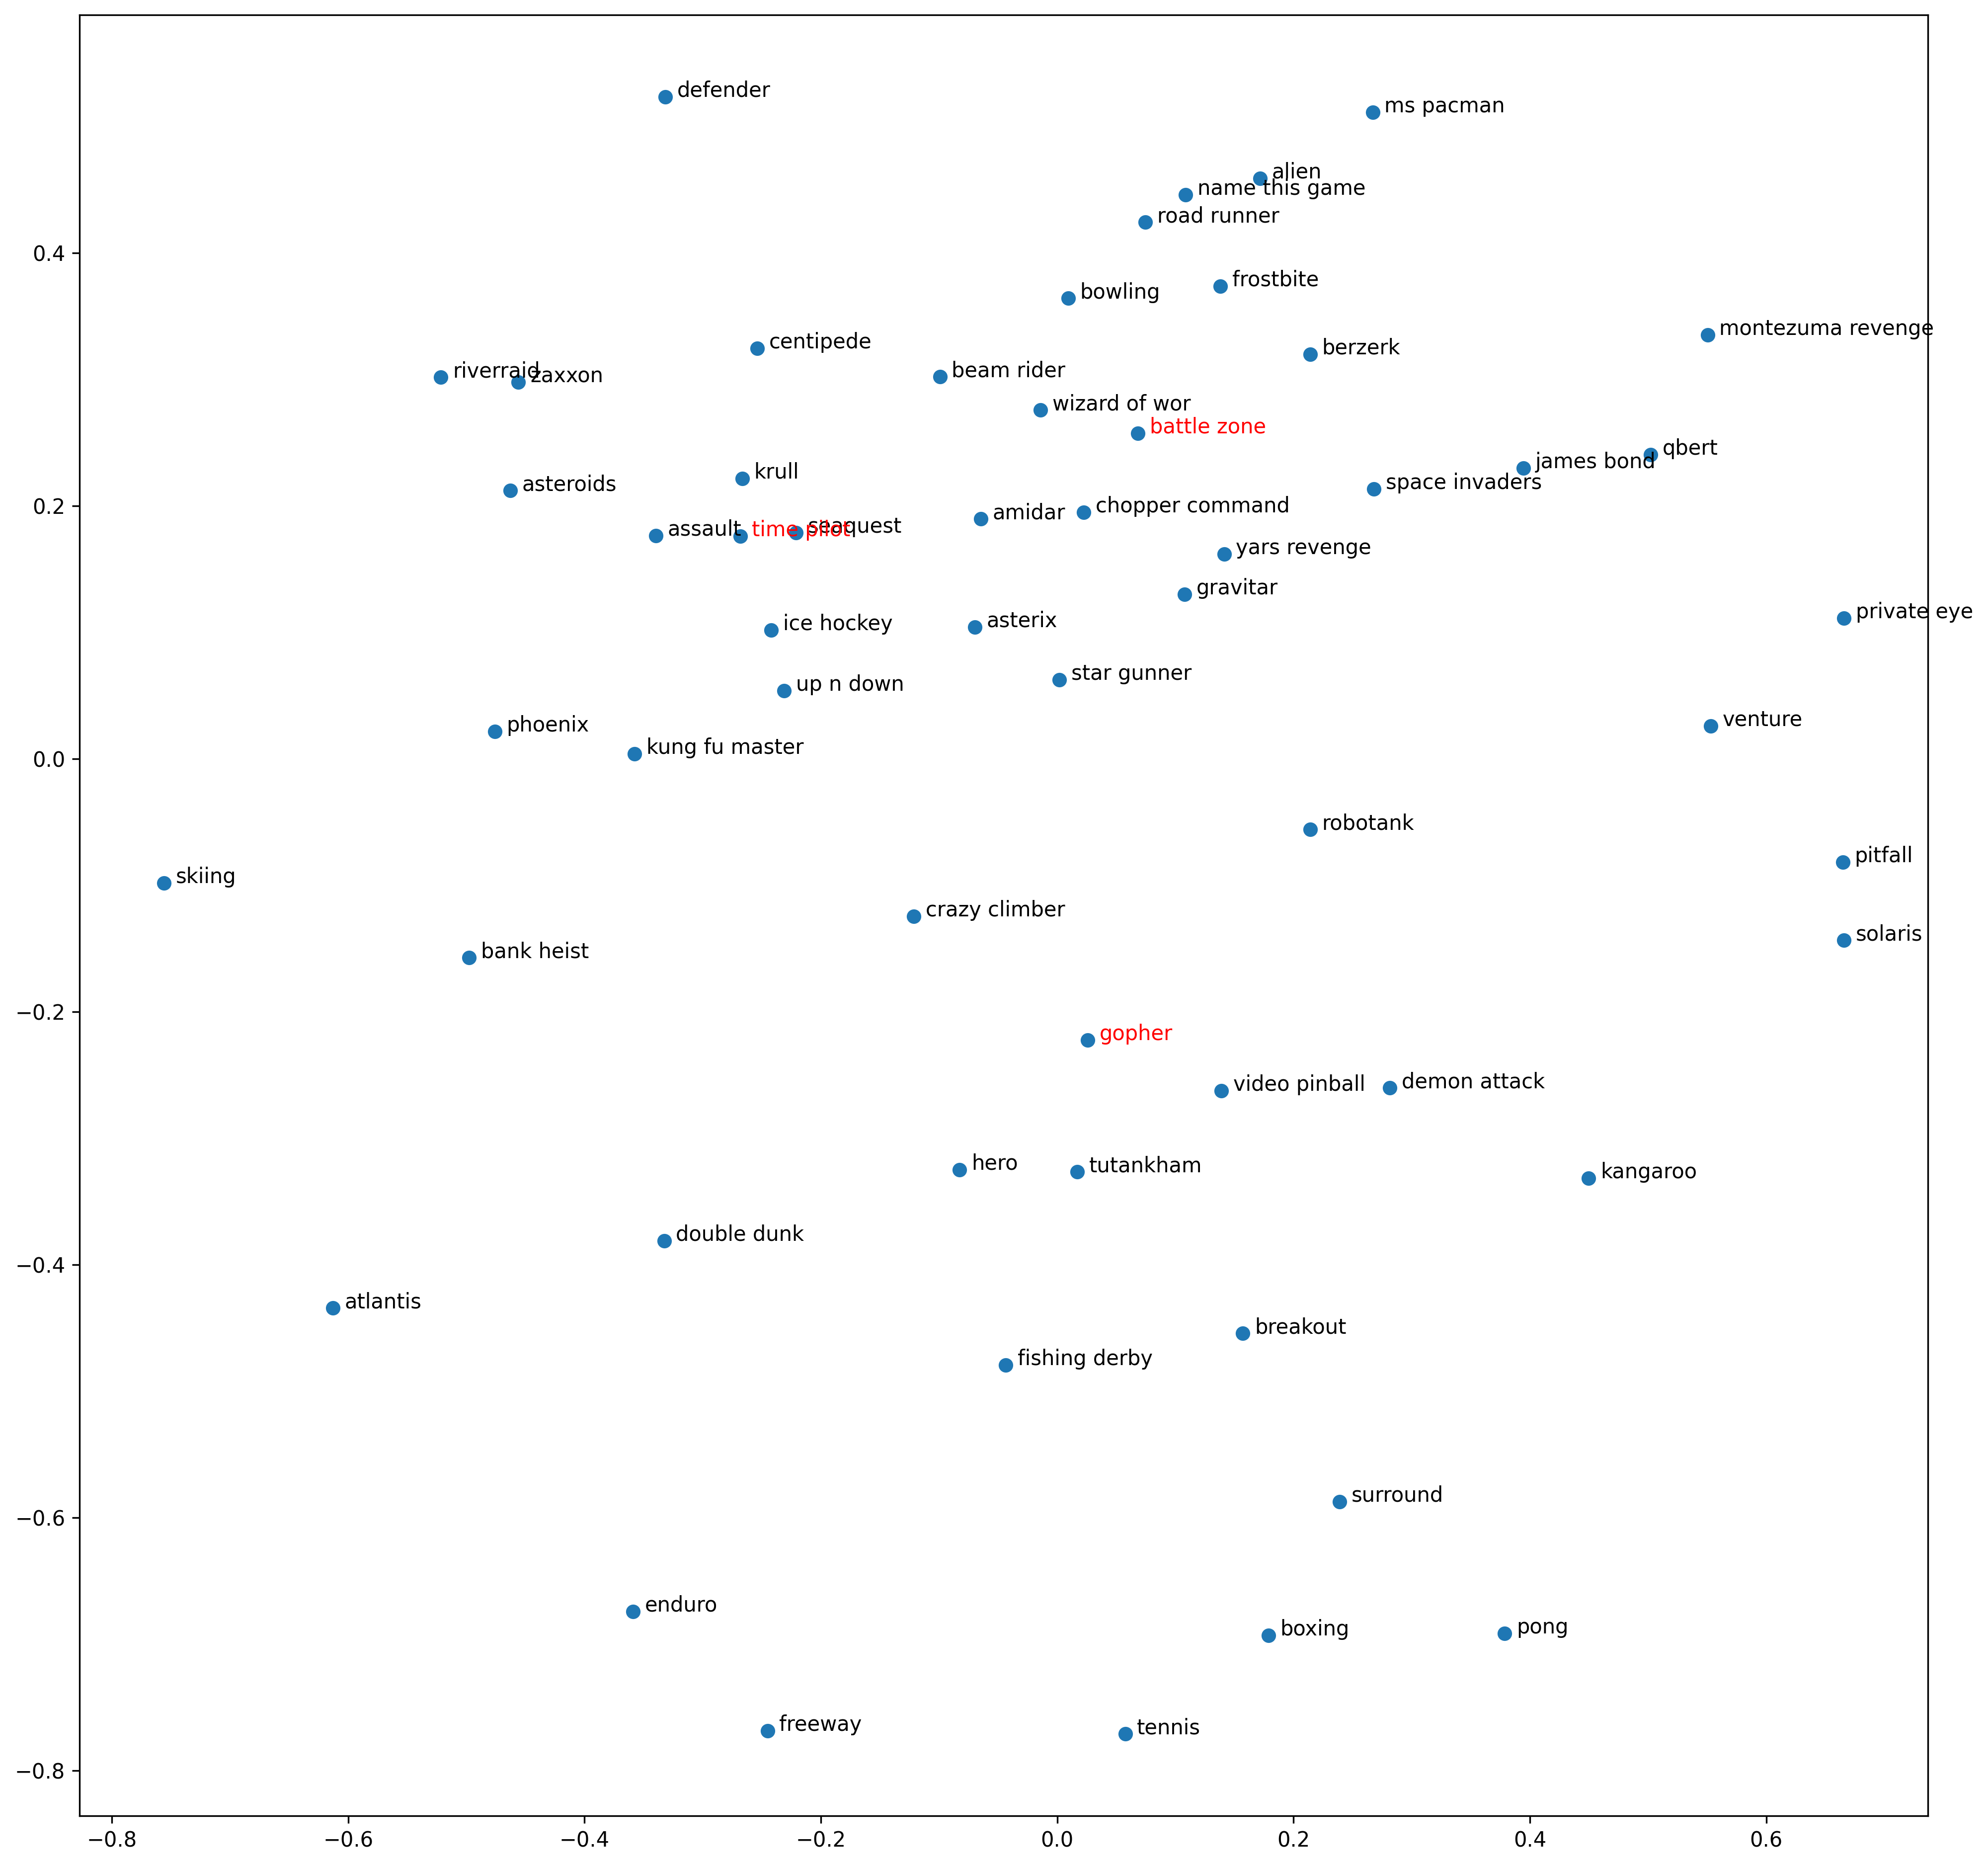

In [28]:
mds = sklearn.manifold.MDS(dissimilarity="precomputed", n_init=4, max_iter=3000, random_state=1)
mds_embeddings = mds.fit_transform(distance)

plt.figure(figsize=(16,16))
xs = [x for x,y in mds_embeddings]
ys = [y for x,y in mds_embeddings]
plt.scatter(xs, ys)

atari3 = atari_subsets[2][1]

ax = plt.gca()
for i, txt in enumerate(canonical_57):    
    c = 'red' if txt in atari3 else 'black'
    ax.annotate(txt, (xs[i]+0.01, ys[i]), color=c)

plt.show()

# 6. Predict Rainbow over time

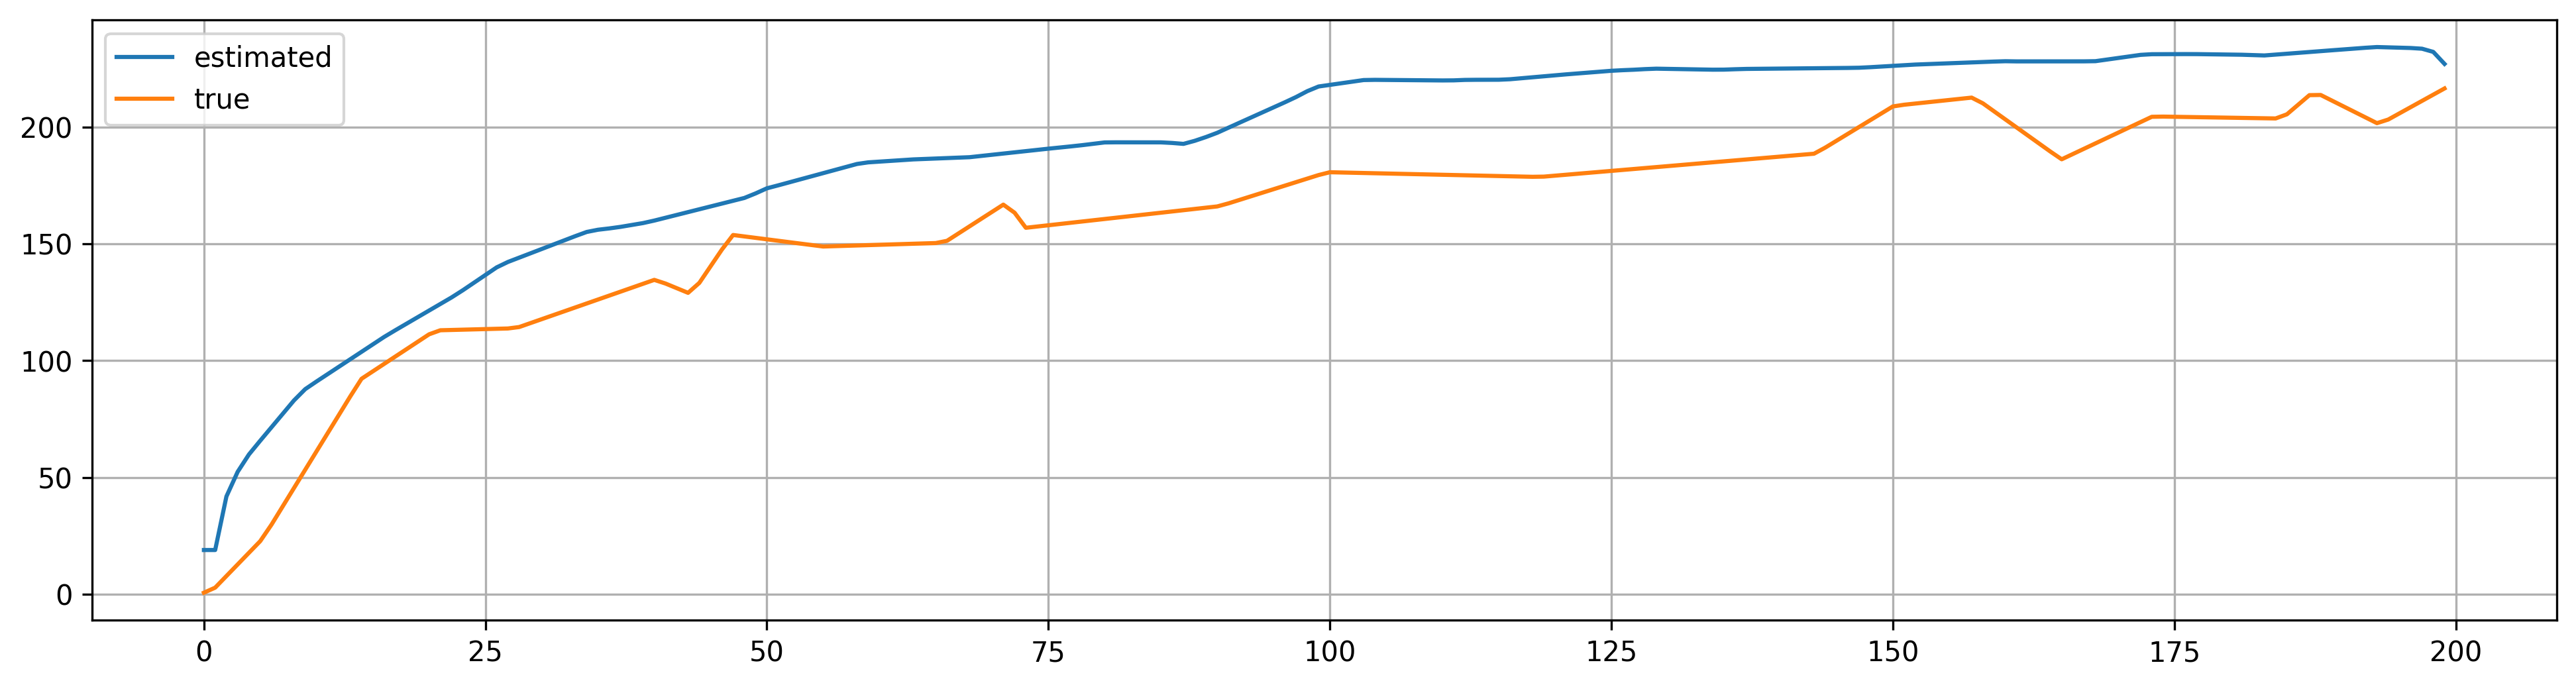

In [29]:
# Produce Rainbow 200M over time

rainbow_bank_heist = [
    (1.7026106696935308, 23.291925465838403),
    (4.086265607264476, 496.8944099378882),
    (9.080590238365499, 995.3416149068324),
    (16.004540295119188, 1150.6211180124224),
    (33.030646992054486, 1232.9192546583852),
    (51.07832009080592, 1262.4223602484471),
    (62.88308740068105, 1319.8757763975154),
    (74.91486946651534, 1341.6149068322982),
    (99.65947786606131, 1336.9565217391305),
    (123.49602724177075, 1336.9565217391305),
    (161.06696935300795, 1340.0621118012423),
    (187.62769580022703, 1338.5093167701864),
    (198.6379114642452, 1327.6397515527951),
]

rainbow_berserk = [
    (1.5598885793871844, 366.5987780040732),
    (3.788300835654592, 662.9327902240329),
    (16.71309192200557, 1396.1303462321794),
    (32.42339832869081, 1817.7189409368636),
    (49.4707520891365, 2037.6782077393075),
    (63.06406685236769, 2214.8676171079433),
    (77.66016713091923, 2031.5682281059067),
    (90.5849582172702, 2220.9775967413443),
    (101.83844011142061, 2220.9775967413443),
    (110.30640668523677, 2196.537678207739),
    (120.4456824512535, 2236.2525458248474),
    (127.35376044568247, 2175.152749490835),
    (136.7130919220056, 2355.397148676171),
    (147.07520891364905, 2181.262729124236),
    (151.86629526462397, 2272.9124236252546),
    (160.89136490250698, 2181.262729124236),
    (176.6016713091922, 2395.1120162932793),
    (192.0891364902507, 2233.1975560081464),
    (199.3314763231198, 2428.7169042769856),
]

rainbow_hero = [
    (1.3460459899046562, 3039.5136778115466),
    (2.0190689848569825, 5592.705167173253),
    (26.472237801458217, 30942.249240121578),
    (34.324172742568706, 35623.100303951364),
    (48.23331463825015, 36474.1641337386),
    (58.32865956253505, 41458.96656534955),
    (80.08973639932698, 45167.17325227963),
    (87.15647784632642, 44498.48024316108),
    (98.7100392596747, 53860.18237082067),
    (110.71228266965788, 53738.601823708195),
    (125.29444756029163, 54954.40729483282),
    (147.72854739203592, 55015.19756838905),
    (180.93101514301742, 55987.84194528875),
    (200, 56048.63221884498),
]

rainbow_krull = [
    (1.509872241579565, 3910.733262486717),
    (1.9744483159117365, 6673.75132837407),
    (8.362369337979096, 8246.546227417641),
    (22.415795586527295, 7832.093517534538),
    (26.016260162601633, 8034.006376195537),
    (36.58536585365853, 7768.331562167907),
    (58.53658536585367, 8257.173219978747),
    (67.94425087108014, 7980.871413390012),
    (85.36585365853658, 8597.236981934113),
    (96.74796747967478, 8150.903294367695),
    (112.19512195121952, 8586.609989373007),
    (146.34146341463418, 8384.697130712009),
    (162.8339140534262, 8459.086078639746),
    (181.41695702671313, 8575.982996811903),
    (196.86411149825784, 8565.356004250798),
    (199.07084785133566, 8044.633368756643),
]


rainbow_kung = [
    (1.4550086544128185, 1786.103750864262),
    (2.994241219135297, 7452.980783955216),
    (39.34950370538799, 26291.885733908115),
    (50.00835278449351, 36329.670482651716),
    (89.67781454034163, 35208.62239381522),
    (103.17591428186932, 43335.88170600981),
    (115.50764047759364, 41299.229223608665),
    (128.70109560689934, 44868.0608082711),
    (134.5828480210861, 44065.42782498131),
    (159.86765477013597, 47507.33188861096),
    (167.8990890824466, 46334.42692937719),
    (172.39984779370474, 48858.70800985627),
    (183.0320143667893, 47438.59543288304),
    (192.71799607419123, 51624.52377527296),
    (198.0380237311888, 50390.85230884883),
    (199.67424140475273, 43182.956143240954),
]


rainbow_median = [
    (0.5649717514124433, 0.681818181818187),
    (5.273069679849343, 24.090909090909093),
    (13.93596986817326, 92.04545454545453),
    (20.52730696798494, 112.95454545454544),
    (27.683615819209052, 113.86363636363637),
    (40.11299435028249, 134.77272727272725),
    (43.31450094161957, 128.40909090909088),
    (46.89265536723164, 153.86363636363637),
    (54.990583804143114, 148.86363636363635),
    (65.72504708097927, 150.45454545454544),
    (71.37476459510358, 167.95454545454544),
    (72.8813559322034, 156.8181818181818),
    (90.20715630885121, 166.13636363636363),
    (99.8116760828625, 180.6818181818182),
    (118.64406779661016, 178.63636363636363),
    (143.12617702448208, 188.63636363636363),
    (150.09416195856872, 209.09090909090907),
    (157.25047080979286, 212.72727272727272),
    (164.97175141242937, 186.13636363636363),
    (173.06967984934087, 204.54545454545453),
    (184.5574387947269, 203.63636363636363),
    (187.3822975517891, 215.22727272727272),
    (193.22033898305082, 201.13636363636363),
    (199.62335216572504, 218.18181818181816),
]


def interpolate(xs, ys, value):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if value <= min(xs): 
        return ys[0]
    if value >= max(xs): 
        return ys[-1]    
    i_high = np.searchsorted(xs, value)
    i_low = i_high-1
    x_low = xs[i_low]
    x_high = xs[i_high]
    
    y_low = ys[i_low]
    y_high = ys[i_high]
        
    factor = (value - x_low) / (x_high-x_low)    
    return (1-factor) * y_low  + factor * y_high

def get_game_data(game):
    if game == "krull":
        return rainbow_krull
    elif game == "kung fu master":
        return rainbow_kung
    elif game == "hero":
        return rainbow_hero
    elif game == "berzerk":
        return rainbow_berserk
    elif game == "bank heist":
        return rainbow_bank_heist
    raise Exception(f"no game called {game}")
    

def get_norm_game_score(game, x):    
    from atari3 import human_scores    
    game_data = get_game_data(game)    
    raw_score = interpolate(*zip(*game_data), x)     
    row = human_scores[human_scores["Game"]==game]
    assert len(row) == 1
    rnd = row["Random"].iloc[0]
    human = row["Human"].iloc[0]    
    norm_score = 100 * (raw_score-rnd) / (human-rnd)
    return norm_score
        
def estimate_median(x):    
    atari_5 = ('bank heist', 'berzerk', 'hero', 'krull', 'kung fu master')    
    scores = np.asarray([get_norm_game_score(game, x) for game in atari_5])
    coef = np.asarray([0.1089, 0.0866, 0.6648, 0.0556, 0.2122])    
    return np.dot(scores, coef)
    
def true_median(x):
    return interpolate(*zip(*rainbow_median), x)     


plt.figure(figsize=(16,4))
xs = np.asarray(np.arange(0,200,1))
ys = [estimate_median(x) for x in xs]
y_true = [true_median(x) for x in xs]
plt.grid()
plt.plot(xs, ys, label="estimated")
plt.plot(xs, y_true, label="true")
plt.legend()
plt.show()
    

In [30]:
print(canonical_57)

['alien', 'amidar', 'assault', 'asterix', 'asteroids', 'atlantis', 'bank heist', 'battle zone', 'beam rider', 'berzerk', 'bowling', 'boxing', 'breakout', 'centipede', 'chopper command', 'crazy climber', 'defender', 'demon attack', 'double dunk', 'enduro', 'fishing derby', 'freeway', 'frostbite', 'gopher', 'gravitar', 'hero', 'ice hockey', 'james bond', 'kangaroo', 'krull', 'kung fu master', 'montezuma revenge', 'ms pacman', 'name this game', 'phoenix', 'pitfall', 'pong', 'private eye', 'qbert', 'riverraid', 'road runner', 'robotank', 'seaquest', 'skiing', 'solaris', 'space invaders', 'star gunner', 'surround', 'tennis', 'time pilot', 'tutankham', 'up n down', 'venture', 'video pinball', 'wizard of wor', 'yars revenge', 'zaxxon']
